# Data Cleaning & Exploratory Data Analysis

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

## Data Understanding

In [ ]:
df = pd.read_csv('heart.csv')
df.head(5)

Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


In [ ]:
missing_values = df.isnull().sum()
print(missing_values)

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64


No missing values were detected, hence no further handling was needed.

In [ ]:
df.describe()

Age   RestingBP  Cholesterol   FastingBS       MaxHR  \
count  918.000000  918.000000   918.000000  918.000000  918.000000   
mean    53.510893  132.396514   198.799564    0.233115  136.809368   
std      9.432617   18.514154   109.384145    0.423046   25.460334   
min     28.000000    0.000000     0.000000    0.000000   60.000000   
25%     47.000000  120.000000   173.250000    0.000000  120.000000   
50%     54.000000  130.000000   223.000000    0.000000  138.000000   
75%     60.000000  140.000000   267.000000    0.000000  156.000000   
max     77.000000  200.000000   603.000000    1.000000  202.000000   

          Oldpeak  HeartDisease  
count  918.000000    918.000000  
mean     0.887364      0.553377  
std      1.066570      0.497414  
min     -2.600000      0.000000  
25%      0.000000      0.000000  
50%      0.600000      1.000000  
75%      1.500000      1.000000  
max      6.200000      1.000000

In [ ]:
df['HeartDisease'].value_counts()

HeartDisease
1    508
0    410
Name: count, dtype: int64

Text(0.5, 1.0, 'Distribution of Heart Disease')

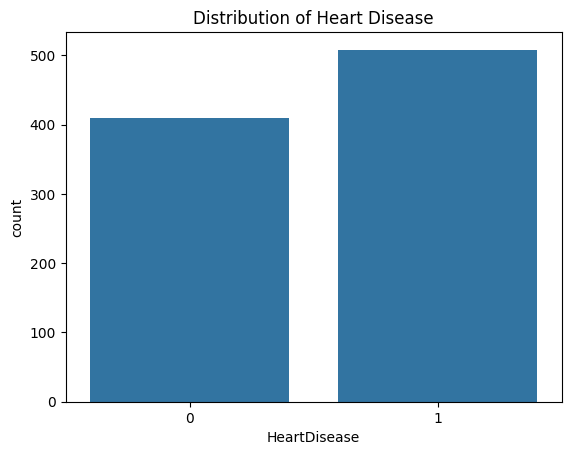

In [ ]:
# Barplot for Heart Disease distribution
sns.countplot(data=df, x=df['HeartDisease'])
plt.title('Distribution of Heart Disease')

## Numerical Variables Analysis

In [ ]:
# Create new dataframe for numerical variables only
numerical_cols = ['Age', 'RestingBP', 'Cholesterol', 'MaxHR', 'Oldpeak']
df_numerical_only = df[numerical_cols].copy()
df_numerical_only

Age  RestingBP  Cholesterol  MaxHR  Oldpeak
0     40        140          289    172      0.0
1     49        160          180    156      1.0
2     37        130          283     98      0.0
3     48        138          214    108      1.5
4     54        150          195    122      0.0
..   ...        ...          ...    ...      ...
913   45        110          264    132      1.2
914   68        144          193    141      3.4
915   57        130          131    115      1.2
916   57        130          236    174      0.0
917   38        138          175    173      0.0

[918 rows x 5 columns]

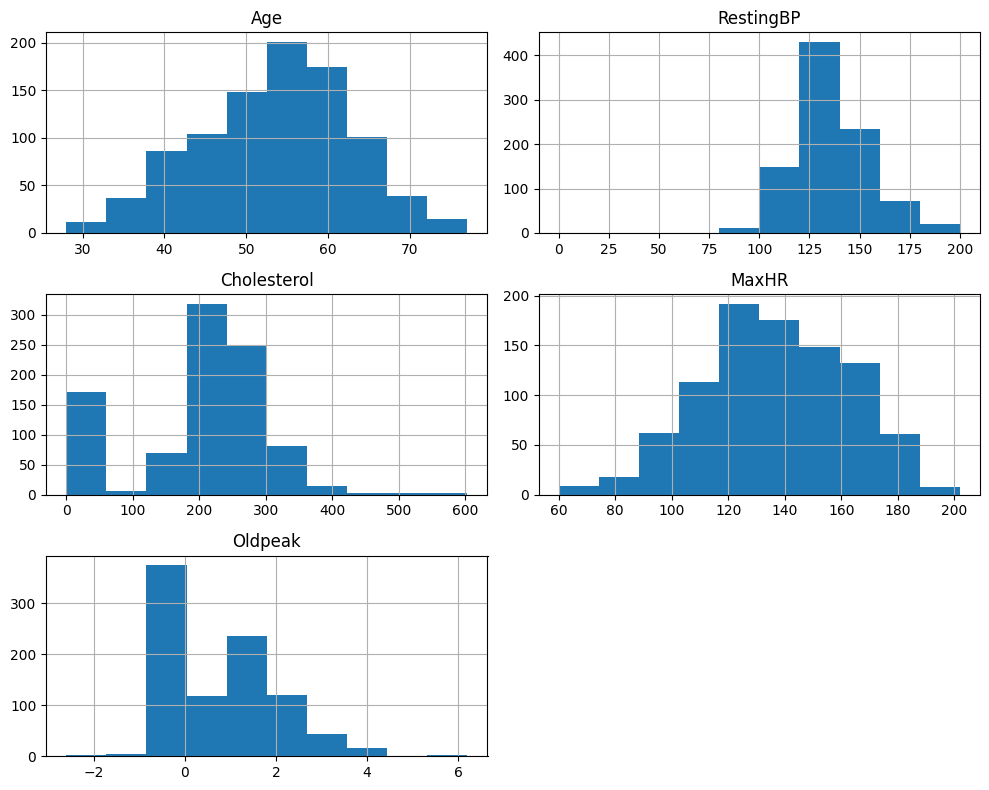

In [ ]:
# Histogram of numerical variables
df_numerical_only.hist(figsize=(10, 8))
plt.tight_layout()
plt.show()

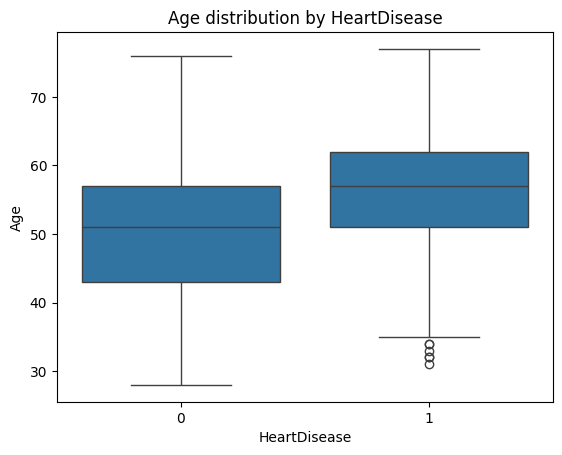

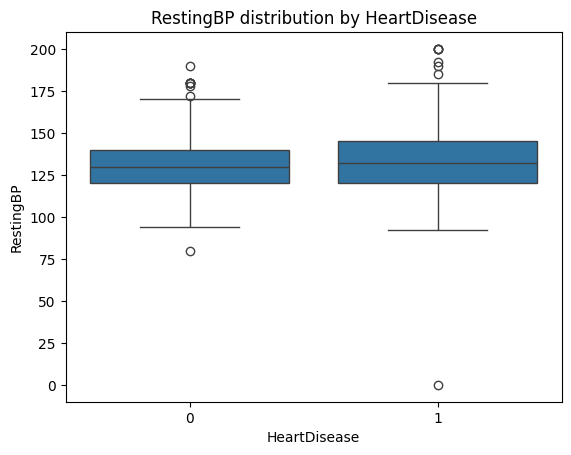

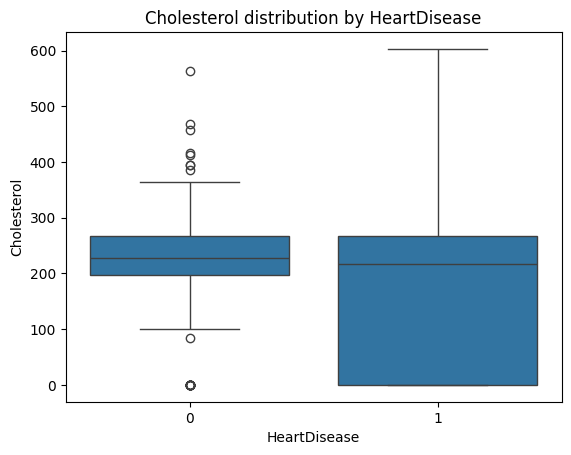

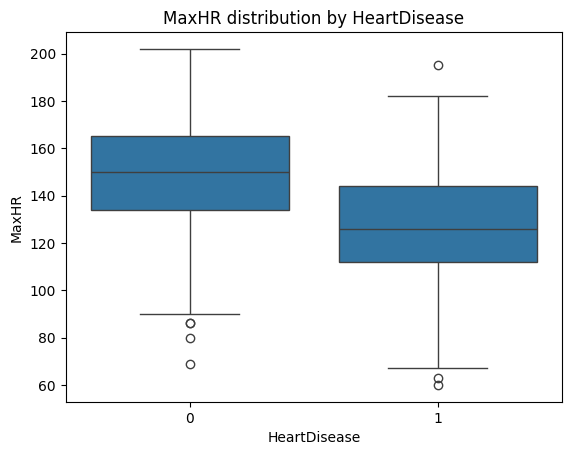

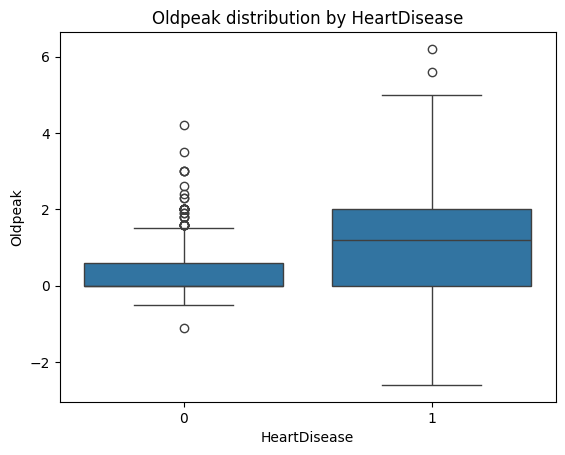

<Figure size 640x480 with 0 Axes>

In [ ]:
# Boxplot for every numerical variables by Heart Disease
for i in df_numerical_only[0:5]:
  sns.boxplot(data = df, x = 'HeartDisease', y = i)
  plt.title(f'{i} distribution by HeartDisease')
  plt.figure()

In [ ]:
# There were outliers but not removed, because in medical datasets, outliers can represent real and important conditions, not necessarily data errors.

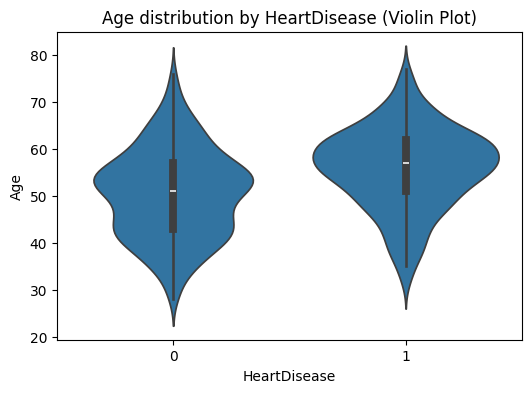

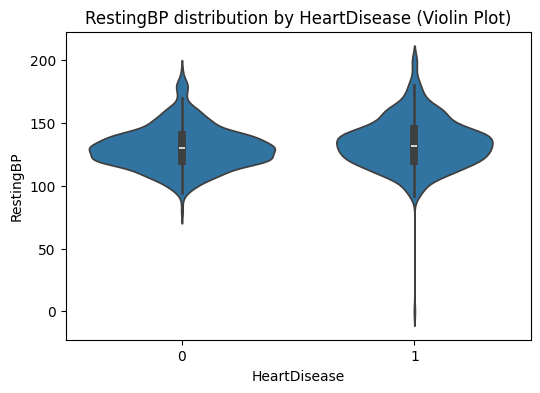

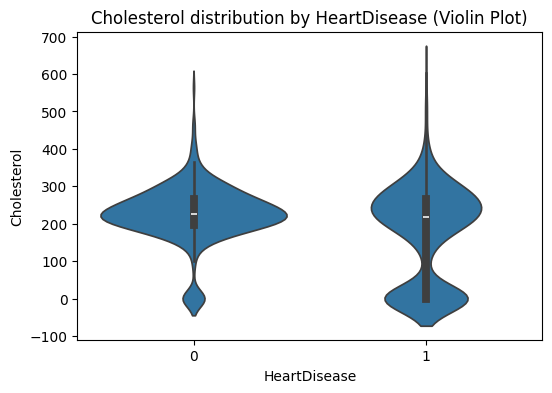

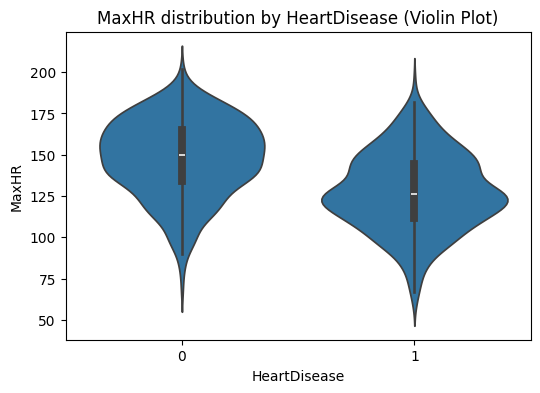

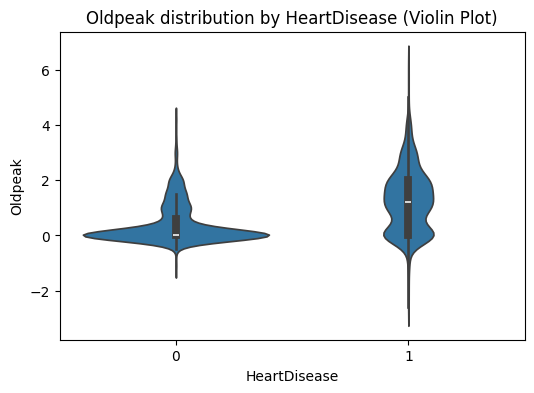

In [ ]:
# Violin plots for numerical variables by Heart Disease
for col in numerical_cols:
    plt.figure(figsize=(6, 4))
    sns.violinplot(data=df, x='HeartDisease', y=col)
    plt.title(f'{col} distribution by HeartDisease (Violin Plot)')
    plt.show()

In [ ]:
# Independent T-tests were used to examine whether the means of numerical features differ significantly between the two target classes (HeartDisease = 0 vs. 1).
# This helps identify which numerical variables are statistically associated with the presence of heart disease.
from scipy.stats import ttest_ind

t_test_results = []

for col in numerical_cols:
    group0 = df[df['HeartDisease'] == 0][col]
    group1 = df[df['HeartDisease'] == 1][col]
    t_stat, p_val = ttest_ind(group0, group1, nan_policy='omit')
    t_test_results.append({
        'Feature': col,
        't-statistic': round(t_stat, 3),
        'p-value': p_val,
        'Significant (p<0.05)': p_val < 0.05
    })

df_ttest_summary = pd.DataFrame(t_test_results)
print(df_ttest_summary)

       Feature  t-statistic       p-value  Significant (p<0.05)
0          Age       -8.897  3.007953e-18                  True
1    RestingBP       -3.275  1.095315e-03                  True
2  Cholesterol        7.243  9.308309e-13                  True
3        MaxHR       13.225  1.137786e-36                  True
4      Oldpeak      -13.365  2.390772e-37                  True


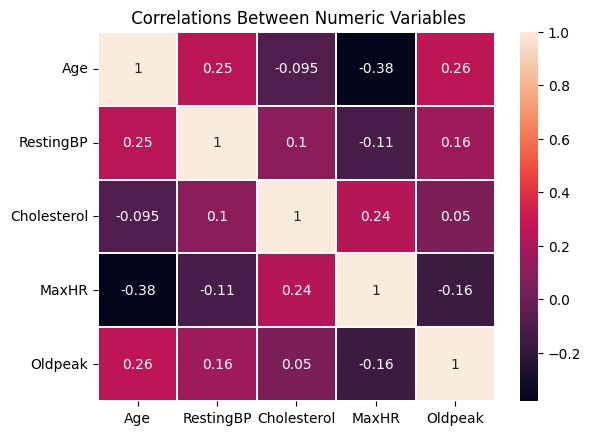

In [ ]:
# Correlation between numerical variables
corr = df_numerical_only.corr()
sns.heatmap(corr,annot=True, linewidth = 0.2)
plt.title(" Correlations Between Numeric Variables")
plt.show()

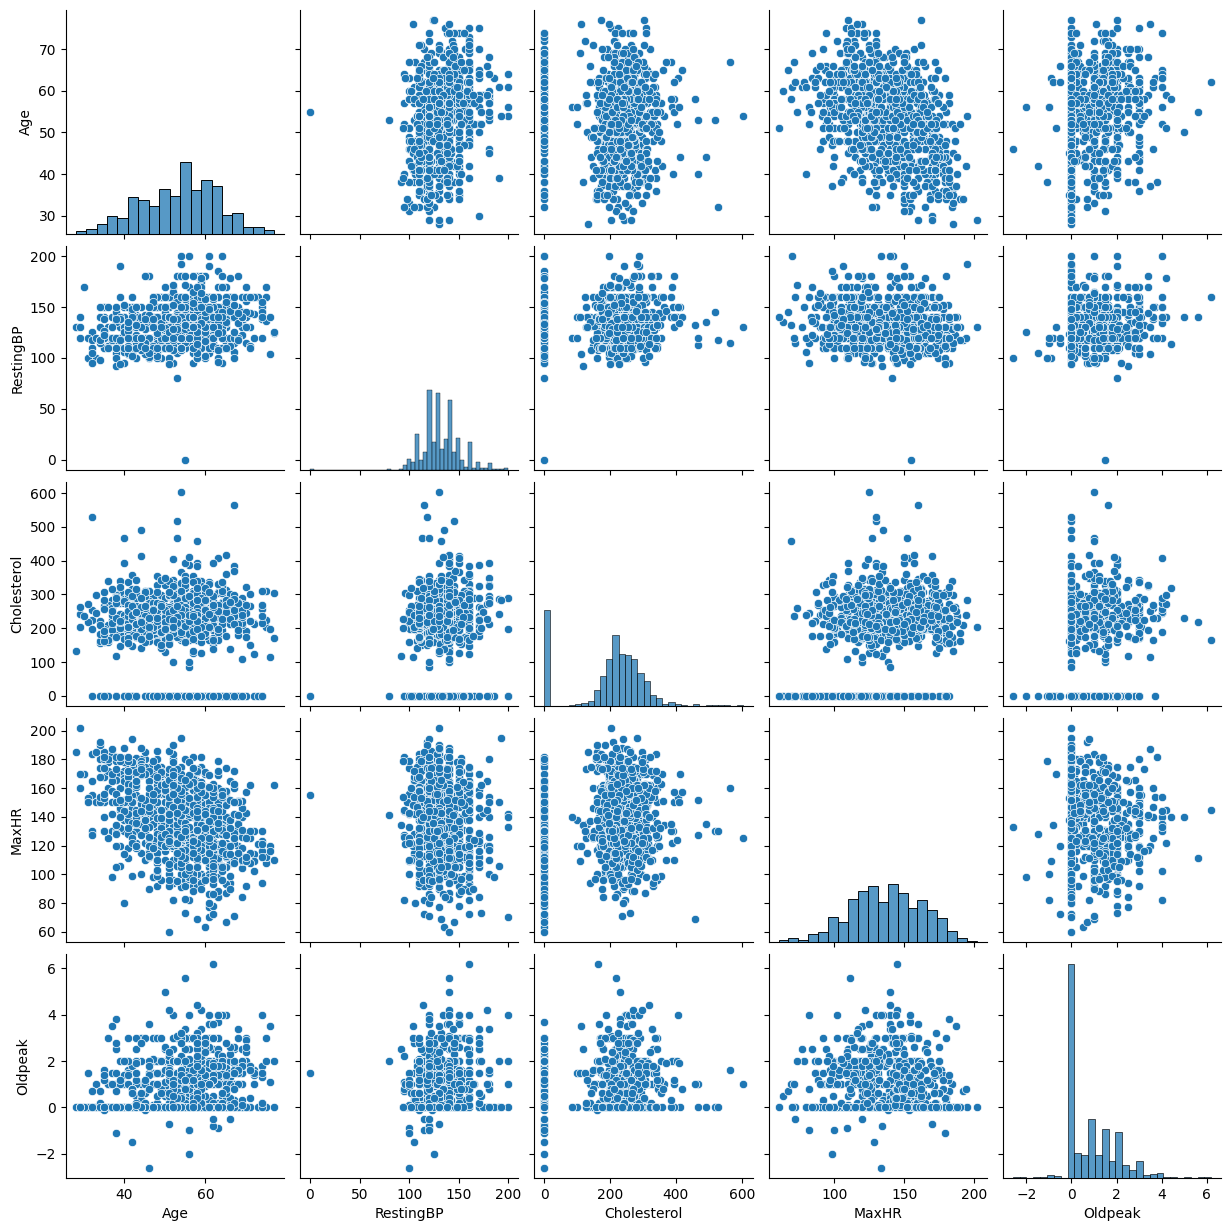

In [ ]:
# Pairplot for numerical variables
sns.pairplot(df_numerical_only)
plt.show()


Most feature pairs do not show strong linear relationships, which is expected given the clinical diversity in patient data.

- MaxHR shows a somewhat inverse trend with Age, suggesting that younger individuals tend to reach higher heart rates during exertion.
- Cholesterol and RestingBP display wide variance with little visible correlation.
- Oldpeak appears to have right-skewed distribution with visible clusters at 0.0, indicating floor effects.

Overall, this confirms low multicollinearity, which is good for models like Logistic Regression.

/usr/local/lib/python3.11/dist-packages/matplotlib/collections.py:1008: RuntimeWarning: invalid value encountered in sqrt
  scale = np.sqrt(self._sizes) * dpi / 72.0 * self._factor


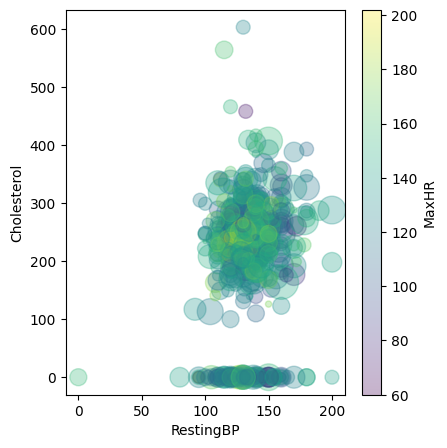

In [ ]:
# Scatter plot of RestingBP VS Cholesterol, with points colored by MaxHR and sized by Oldpeak
df.plot.scatter(x = 'RestingBP', y = 'Cholesterol', figsize = (4.5,5), c = 'MaxHR',
                                  cmap = plt.get_cmap('viridis'), alpha = 0.3, s = df['Oldpeak']*100)
plt.show()

## Categorical Variables Analysis

In [ ]:
# Create new dataframe for categorical variables only
categorical_cols = ['Sex', 'ChestPainType', 'FastingBS', 'RestingECG', 'ExerciseAngina', 'ST_Slope', 'HeartDisease']
df_categorical = df[categorical_cols].copy()
df_categorical

Sex ChestPainType  FastingBS RestingECG ExerciseAngina ST_Slope  \
0     M           ATA          0     Normal              N       Up   
1     F           NAP          0     Normal              N     Flat   
2     M           ATA          0         ST              N       Up   
3     F           ASY          0     Normal              Y     Flat   
4     M           NAP          0     Normal              N       Up   
..   ..           ...        ...        ...            ...      ...   
913   M            TA          0     Normal              N     Flat   
914   M           ASY          1     Normal              N     Flat   
915   M           ASY          0     Normal              Y     Flat   
916   F           ATA          0        LVH              N     Flat   
917   M           NAP          0     Normal              N       Up   

     HeartDisease  
0               0  
1               1  
2               0  
3               1  
4               0  
..            ...  
913             1  
914             1  
915             1  
916             1  
917             0  

[918 rows x 7 columns]

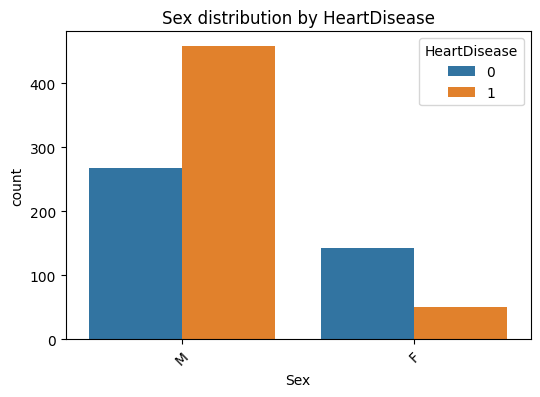

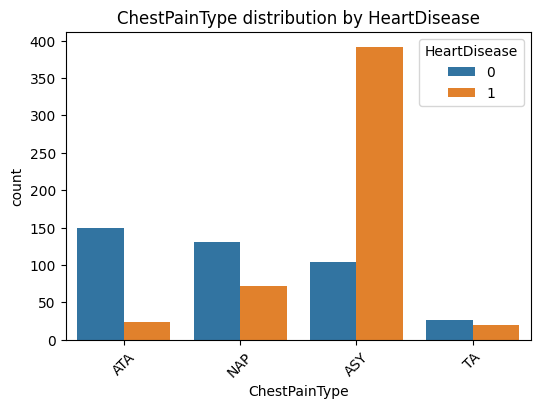

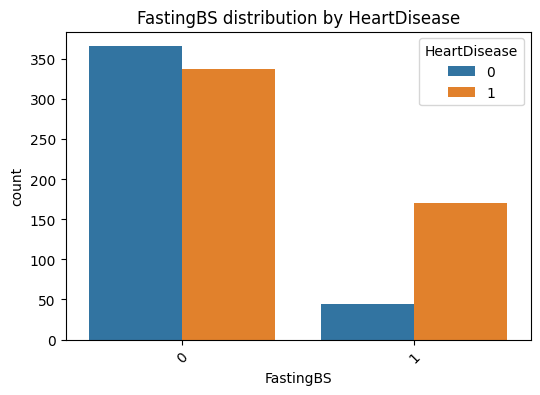

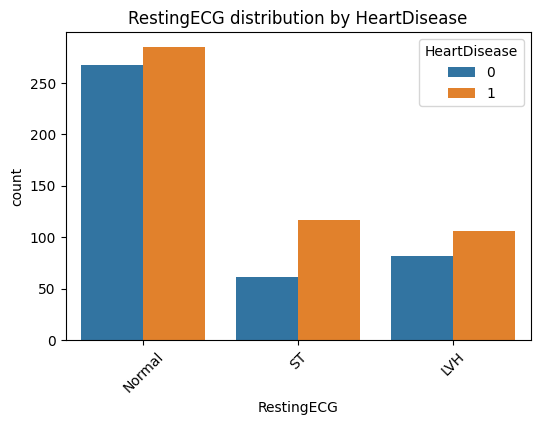

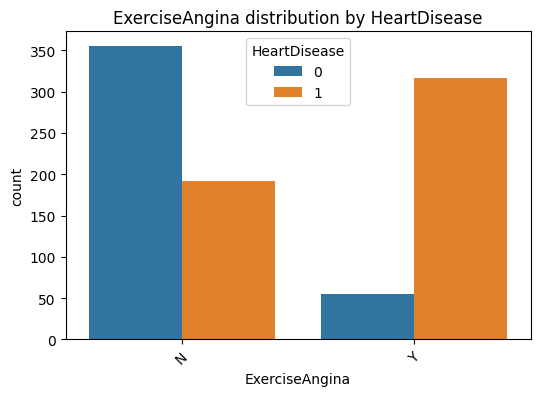

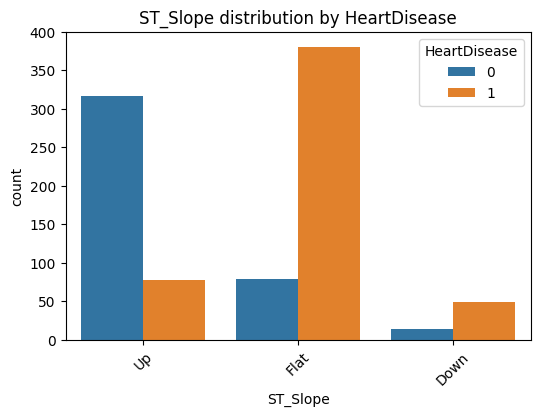

In [ ]:
# Barplot for every categorical variables by Heart Disease
for col in df_categorical.columns[0:6]:
    plt.figure(figsize=(6, 4))
    sns.countplot(data=df, x=col, hue='HeartDisease')
    plt.title(f'{col} distribution by HeartDisease')
    plt.xticks(rotation=45)
    plt.show()


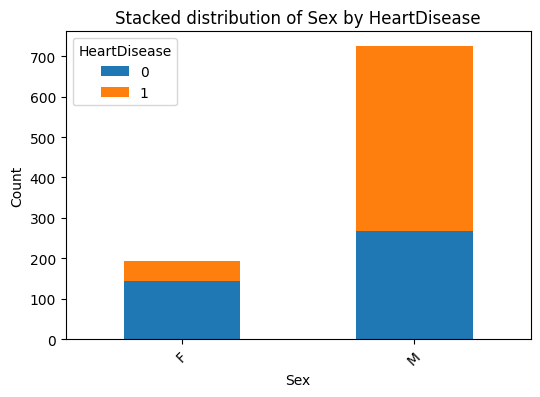

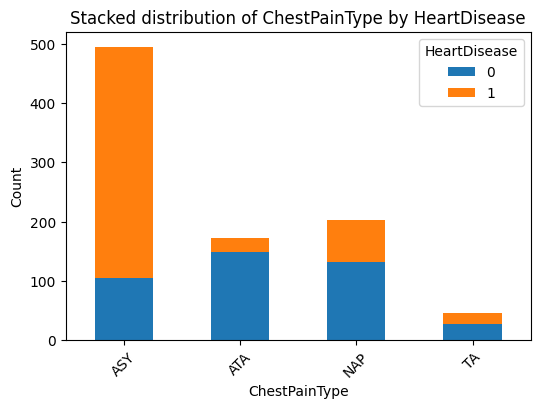

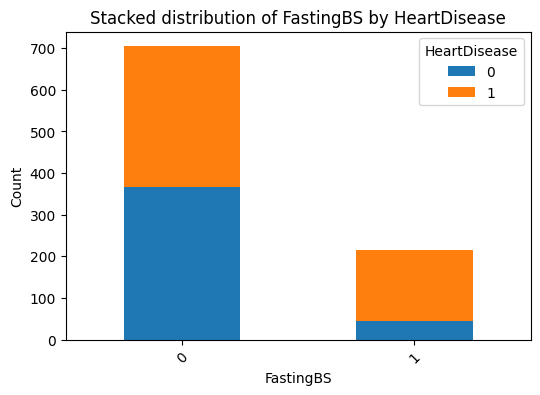

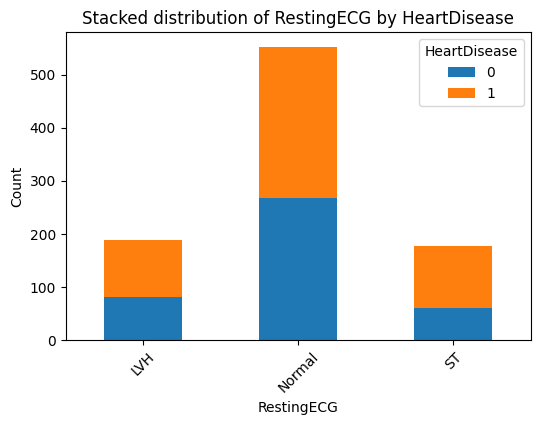

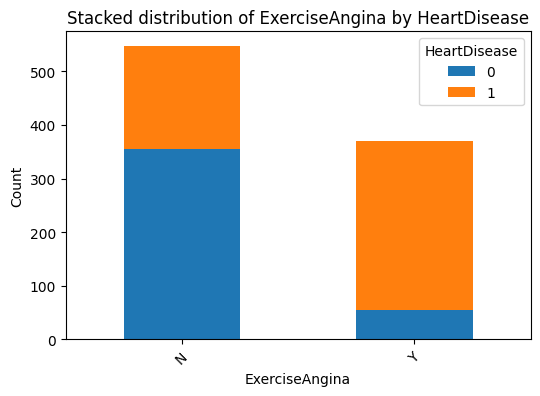

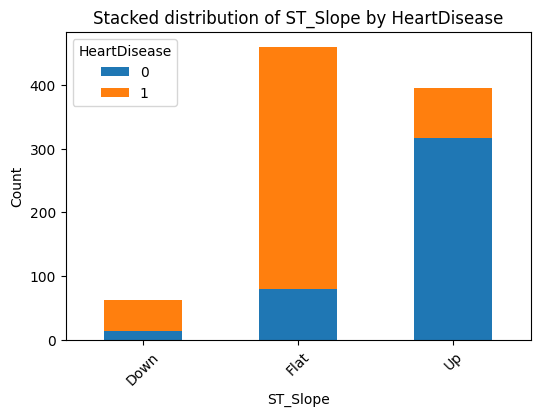

In [ ]:
# Stacked bar plot for categorical variables by Heart Disease
for col in df_categorical.columns[0:6]:
    contingency = pd.crosstab(df[col], df['HeartDisease'])
    contingency.plot(kind='bar', stacked=True, figsize=(6, 4))
    plt.title(f'Stacked distribution of {col} by HeartDisease')
    plt.xticks(rotation=45)
    plt.ylabel('Count')
    plt.show()

In [ ]:
# Chi-Square tests were performed to evaluate the association between each categorical feature and the target variable (HeartDisease).
# This test determines whether distributions of categorical variables differ significantly between patients with and without heart disease.
from scipy.stats import chi2_contingency
chi2_results = []

for col in df_categorical.columns[0:6]:
    contingency = pd.crosstab(df[col], df['HeartDisease'])
    chi2, p_val, dof, ex = chi2_contingency(contingency)
    chi2_results.append({
        'Feature': col,
        'Chi2-statistic': round(chi2, 3),
        'p-value': p_val,
        'Significant (p<0.05)': p_val < 0.05
    })

df_chi2_summary = pd.DataFrame(chi2_results)
print(df_chi2_summary)

          Feature  Chi2-statistic       p-value  Significant (p<0.05)
0             Sex          84.145  4.597617e-20                  True
1   ChestPainType         268.067  8.083728e-58                  True
2       FastingBS          64.321  1.057302e-15                  True
3      RestingECG          10.931  4.229233e-03                  True
4  ExerciseAngina         222.259  2.907808e-50                  True
5        ST_Slope         355.918  5.167638e-78                  True


In [ ]:
# Distribution of every categorical variables
for i in df_categorical.columns:
    print(df_categorical[i].value_counts())

Sex
M    725
F    193
Name: count, dtype: int64
ChestPainType
ASY    496
NAP    203
ATA    173
TA      46
Name: count, dtype: int64
FastingBS
0    704
1    214
Name: count, dtype: int64
RestingECG
Normal    552
LVH       188
ST        178
Name: count, dtype: int64
ExerciseAngina
N    547
Y    371
Name: count, dtype: int64
ST_Slope
Flat    460
Up      395
Down     63
Name: count, dtype: int64
HeartDisease
1    508
0    410
Name: count, dtype: int64


## Analysis Between Numerical and Categorical Variables

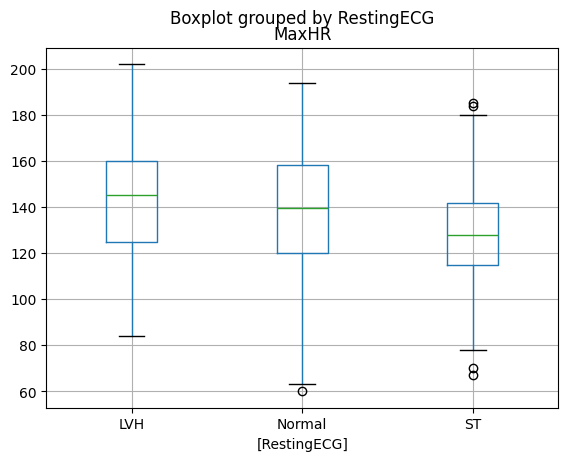

In [ ]:
# Box plot of MaxHR grouped by RestingECG categories
df[['MaxHR', 'RestingECG']].boxplot(by = 'RestingECG')
plt.show()

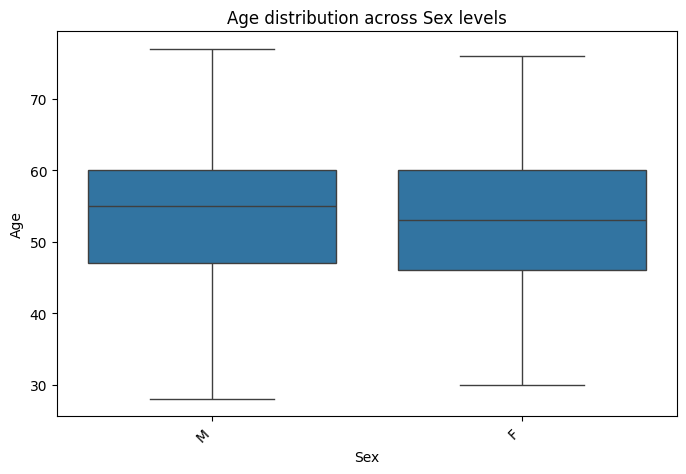

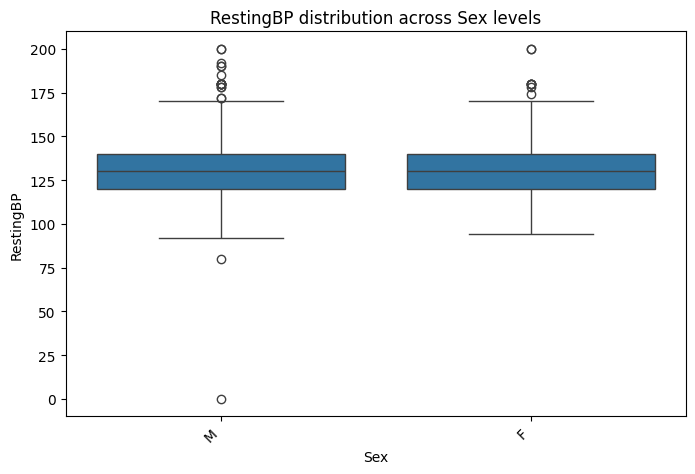

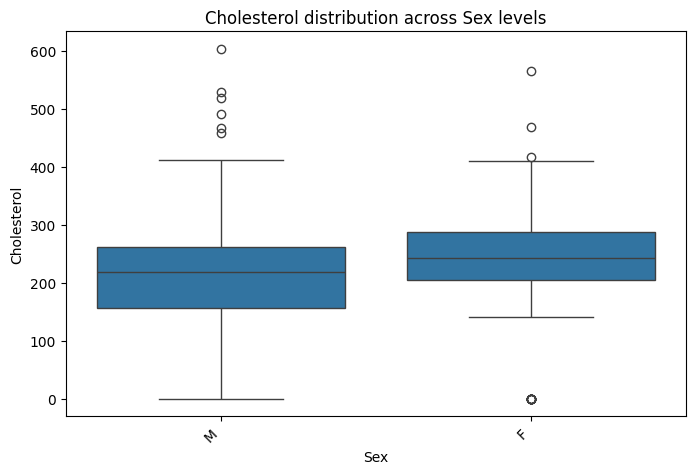

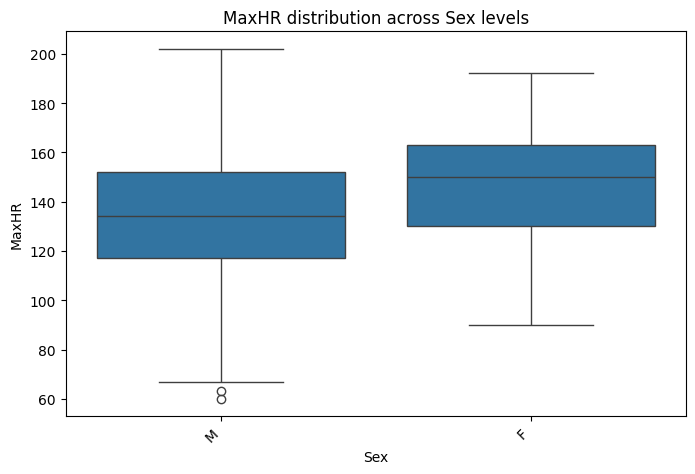

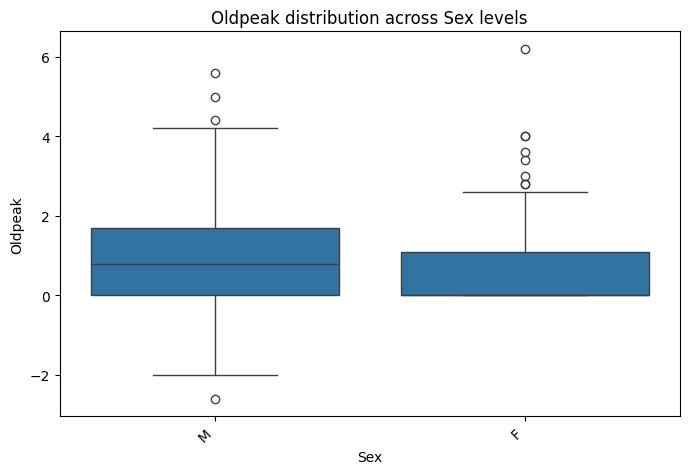

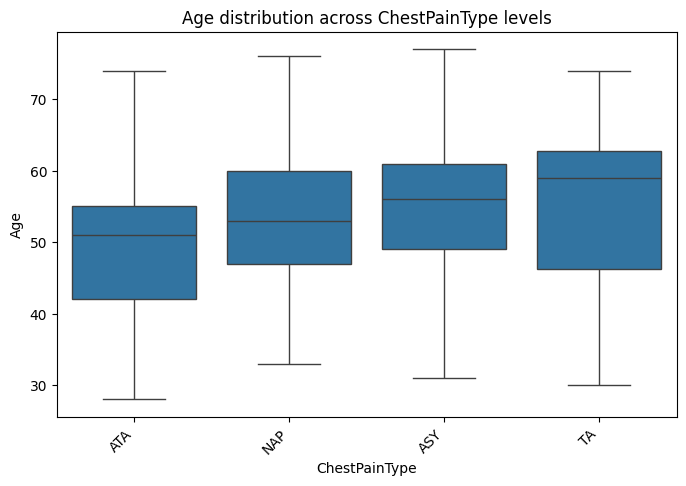

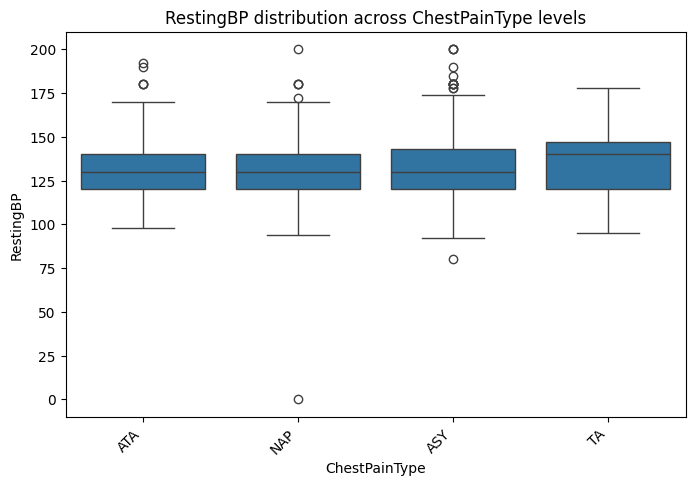

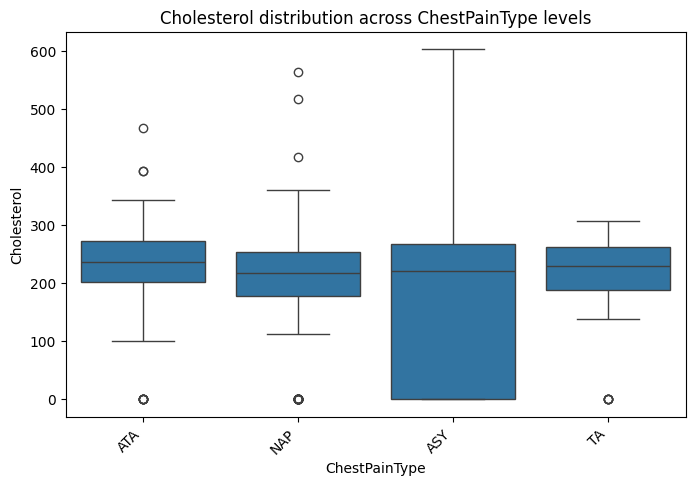

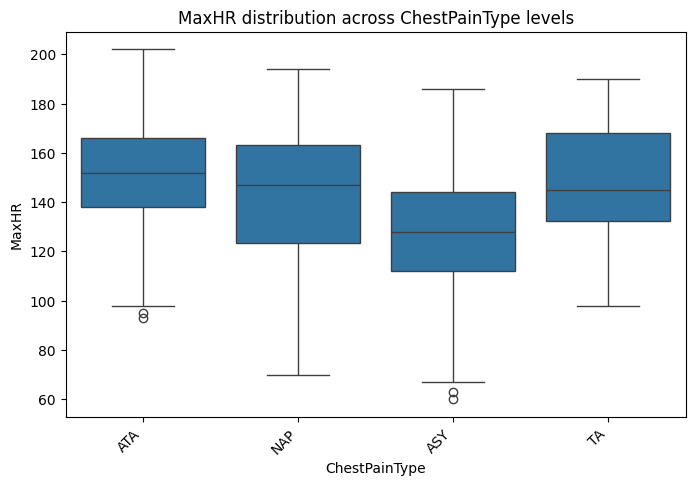

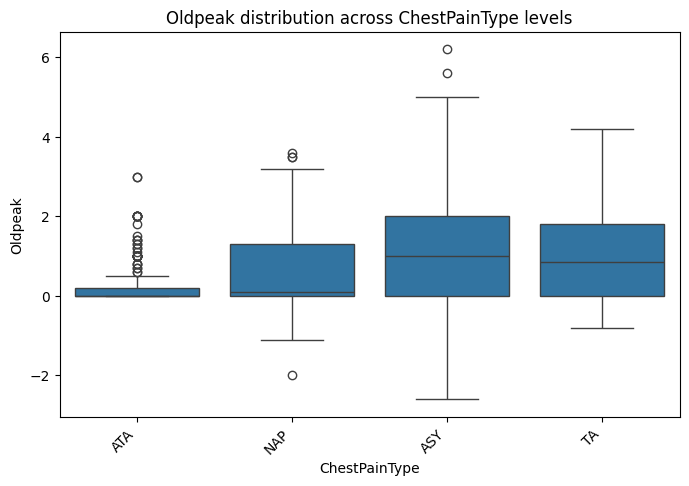

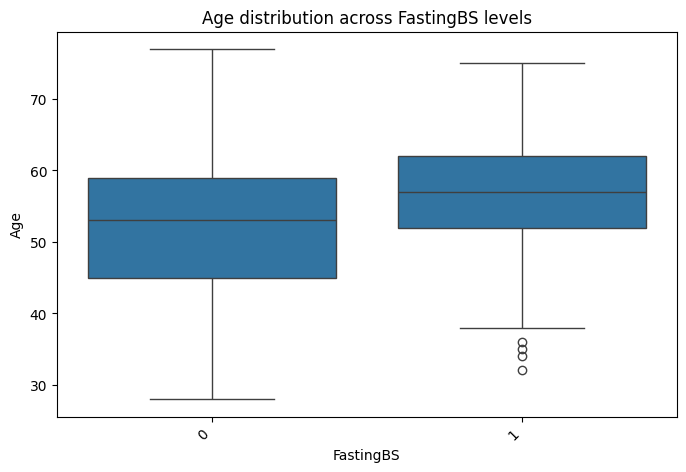

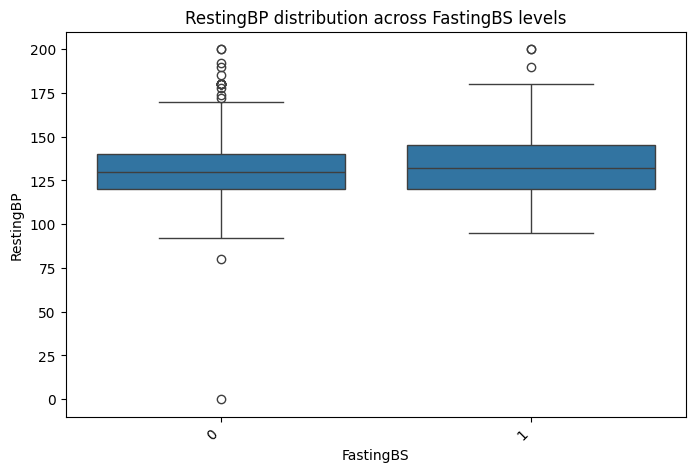

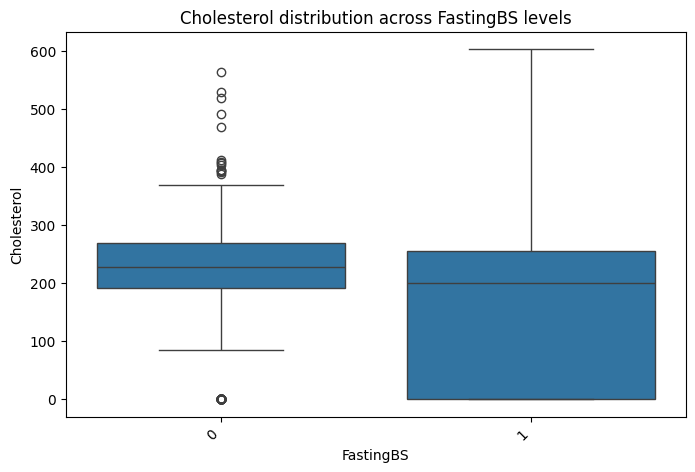

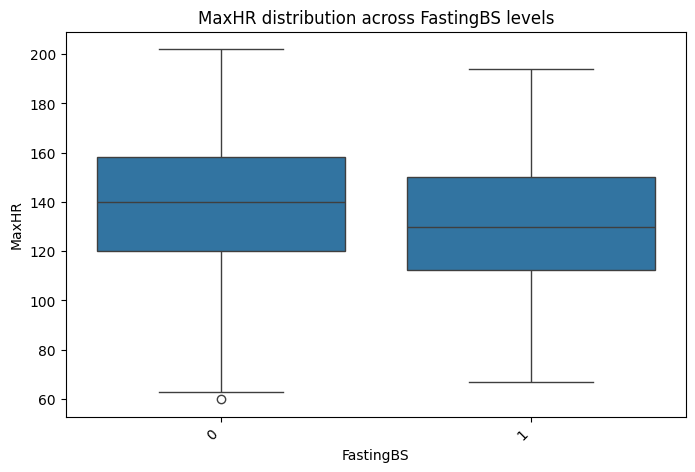

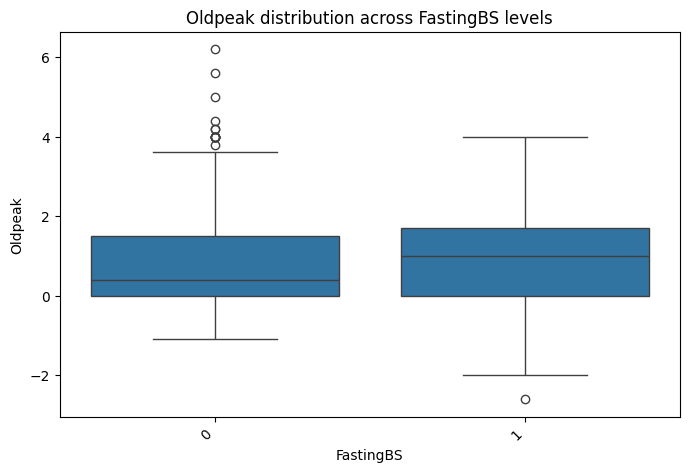

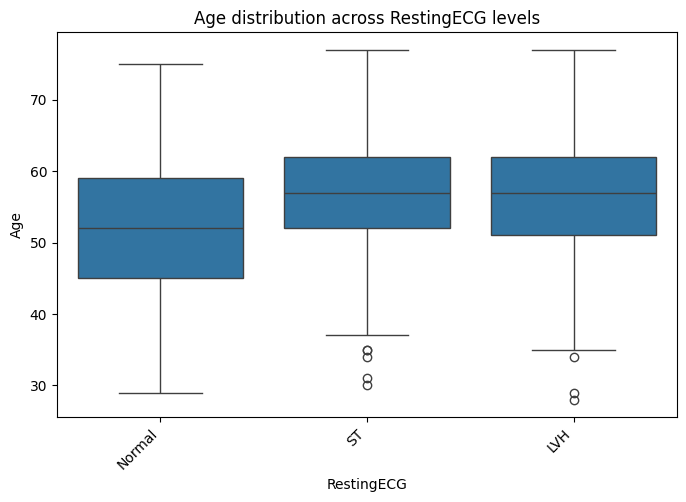

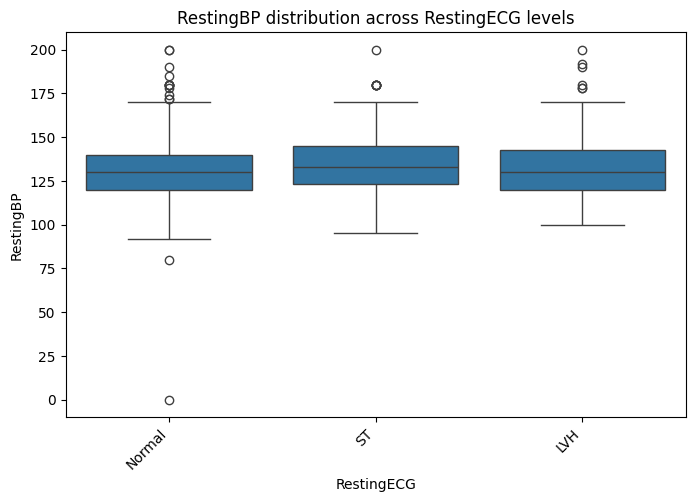

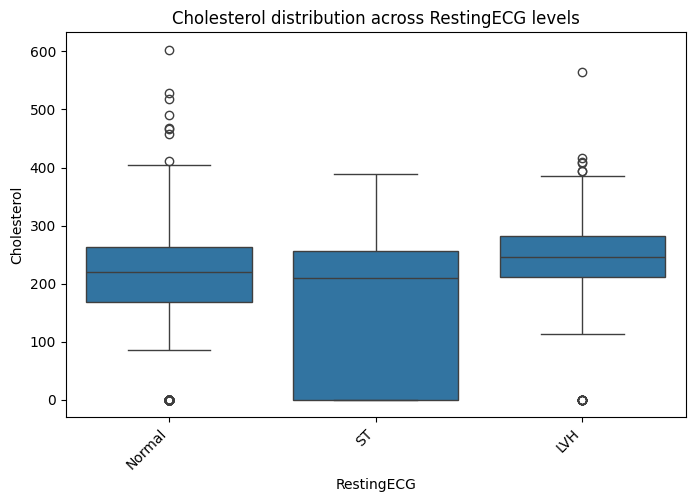

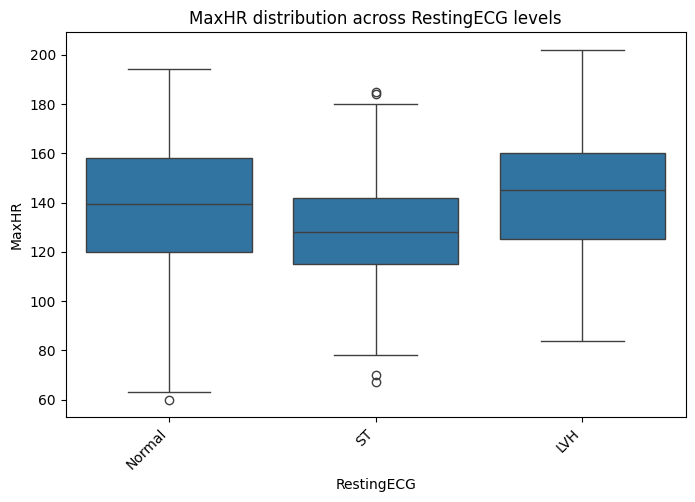

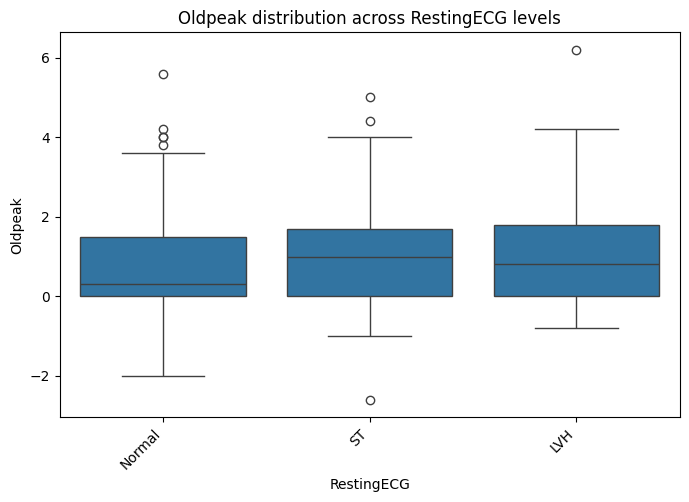

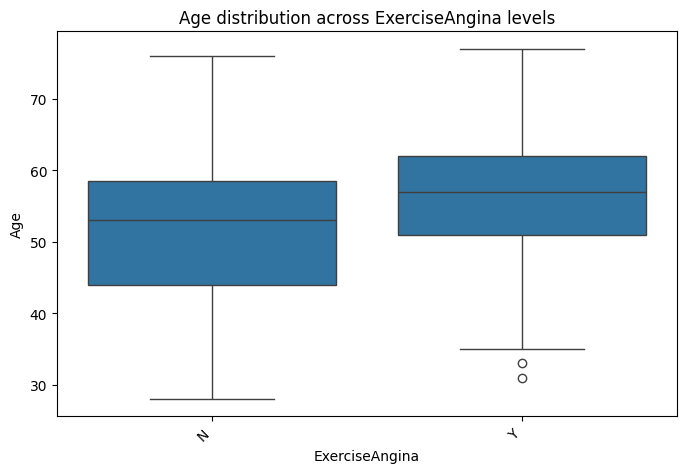

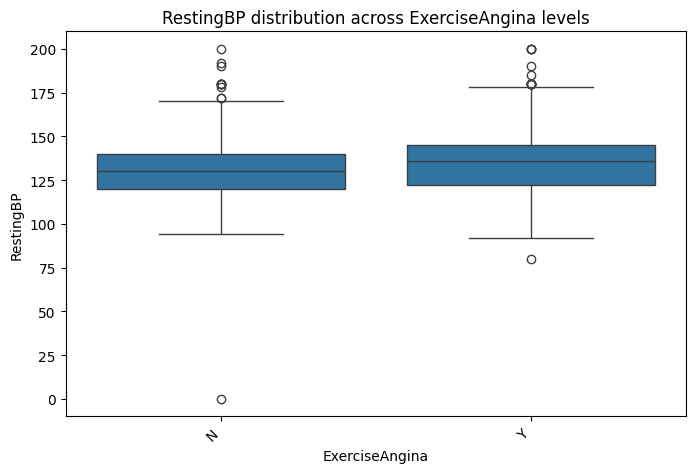

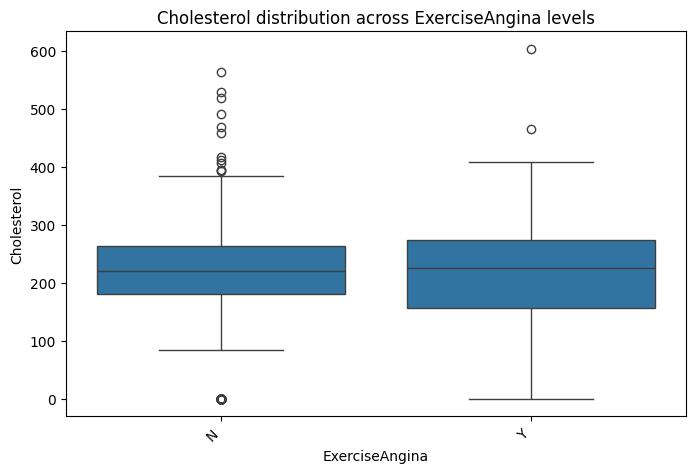

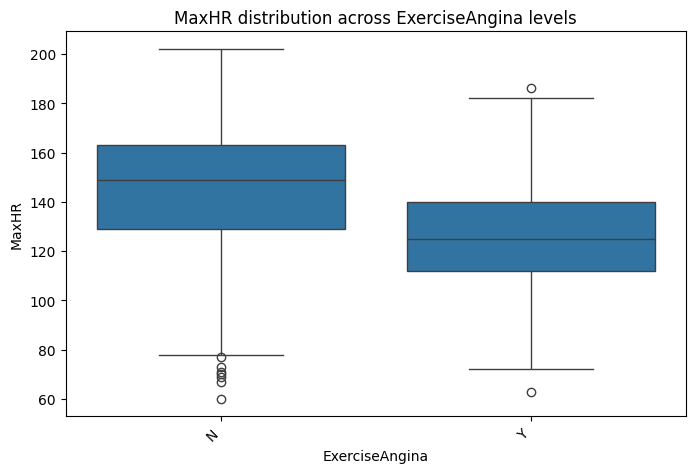

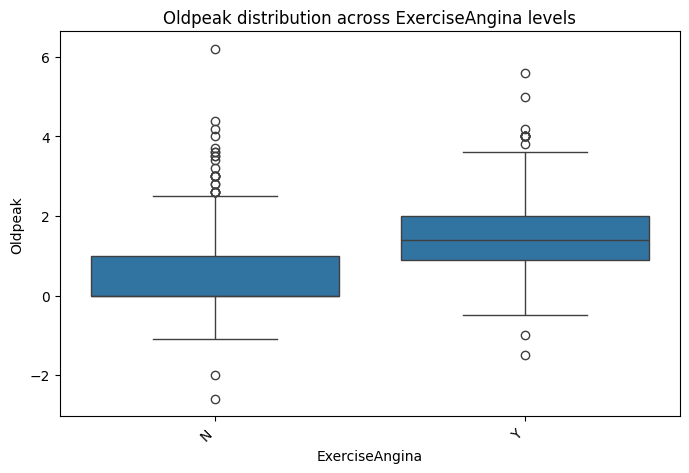

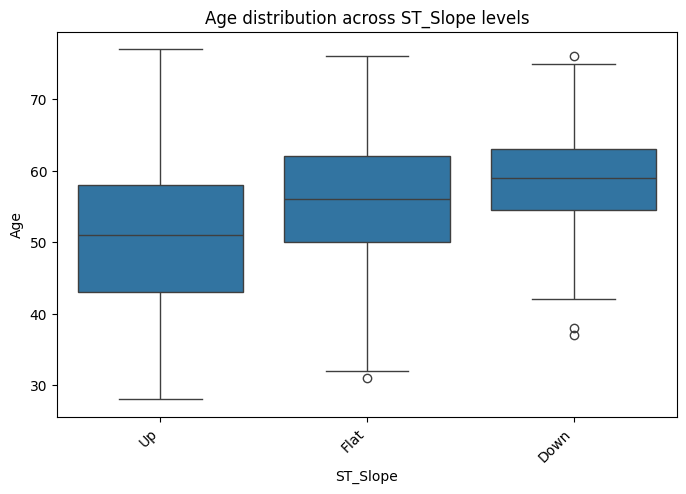

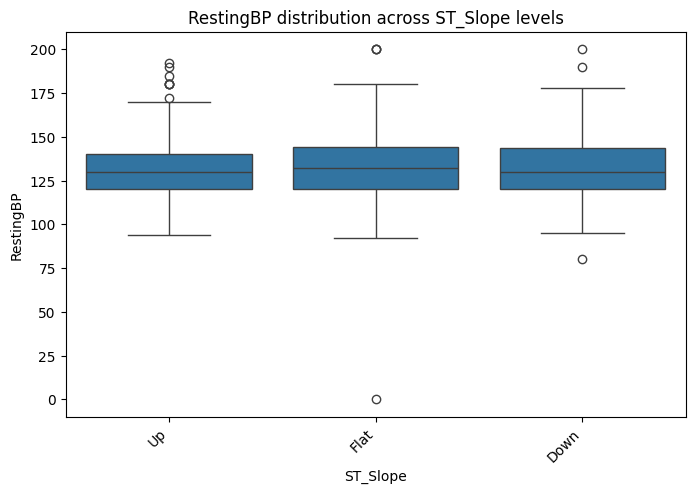

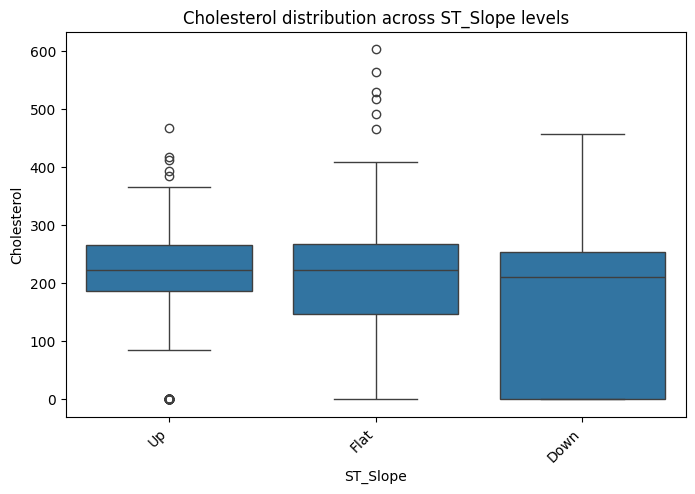

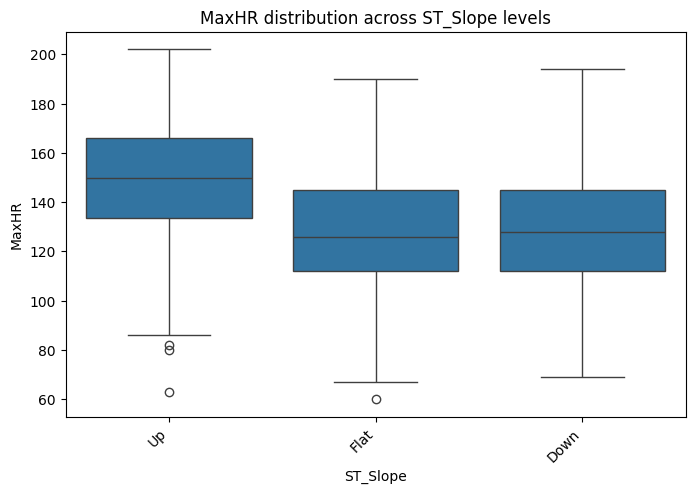

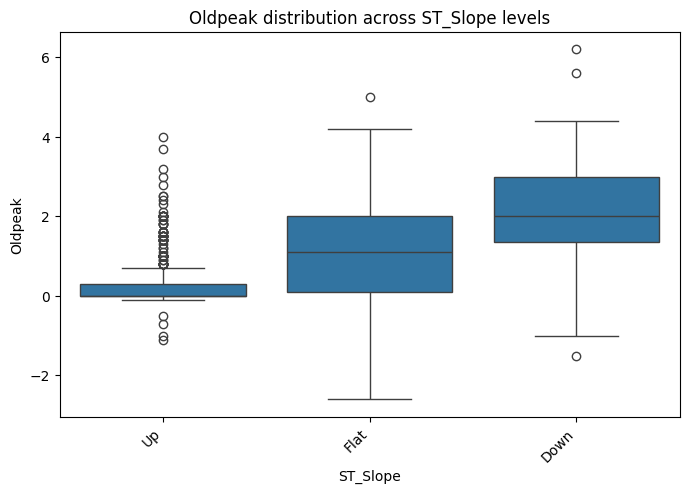

In [ ]:
# Boxplot for each numerical variable across levels of categorical variables
for cat_col in categorical_cols[:-1]: # Exclude 'HeartDisease' as it's the target
    for num_col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.boxplot(data=df, x=cat_col, y=num_col)
        plt.title(f'{num_col} distribution across {cat_col} levels')
        plt.xticks(rotation=45, ha='right')
        plt.show()


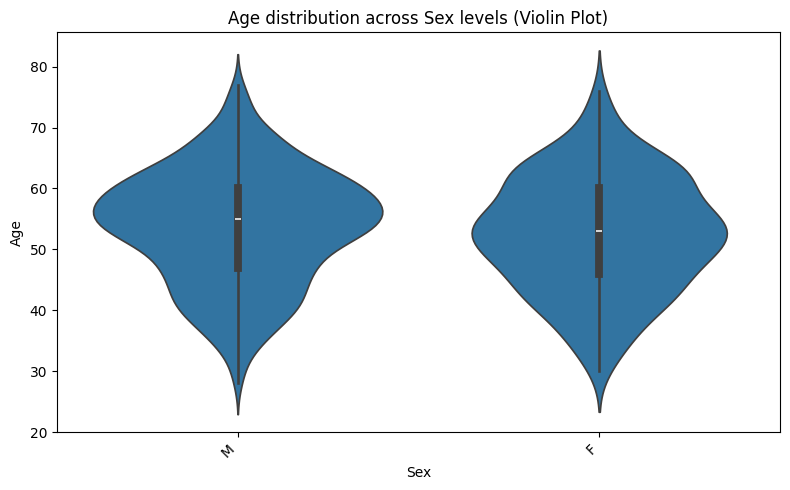

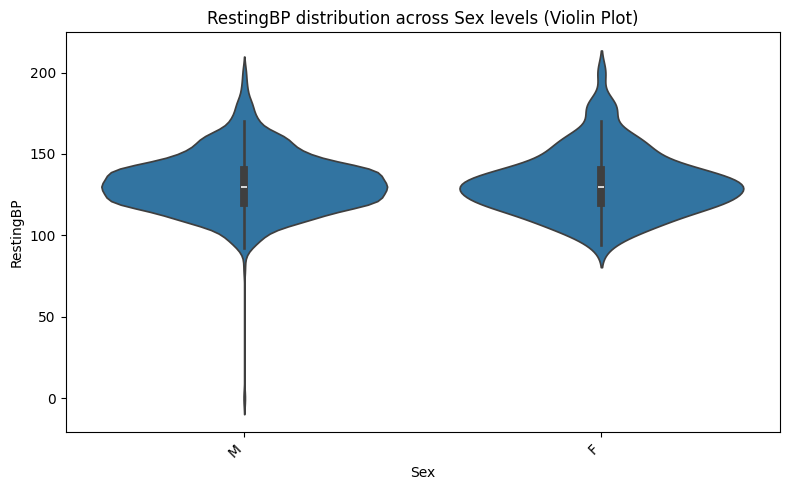

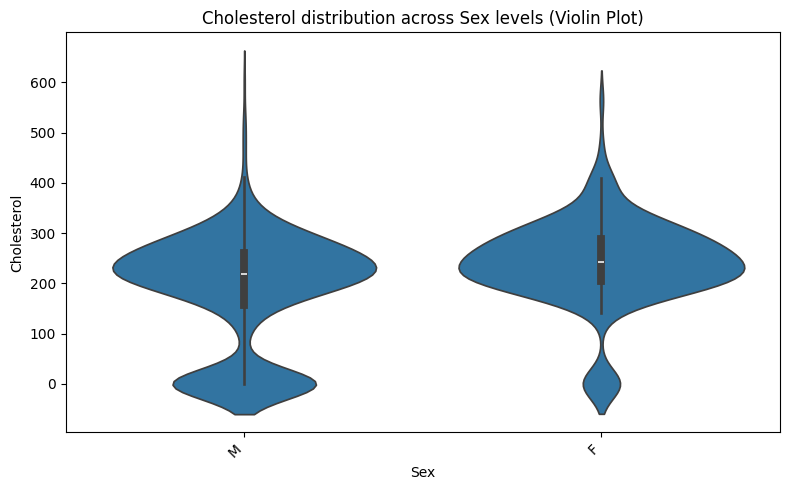

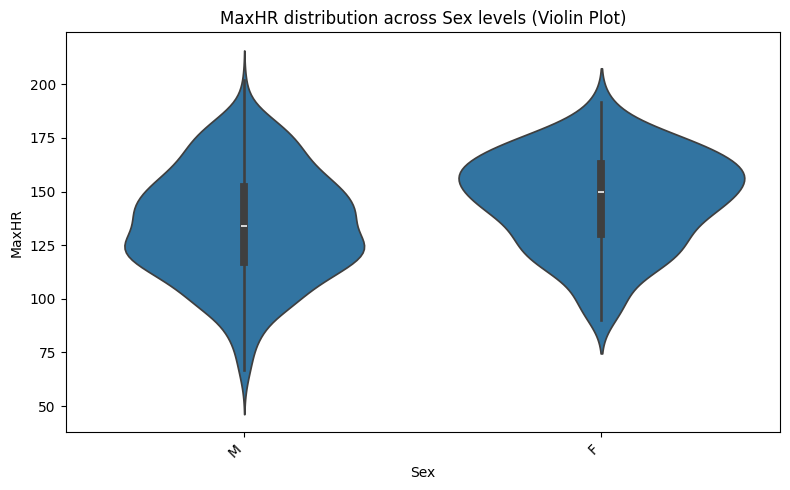

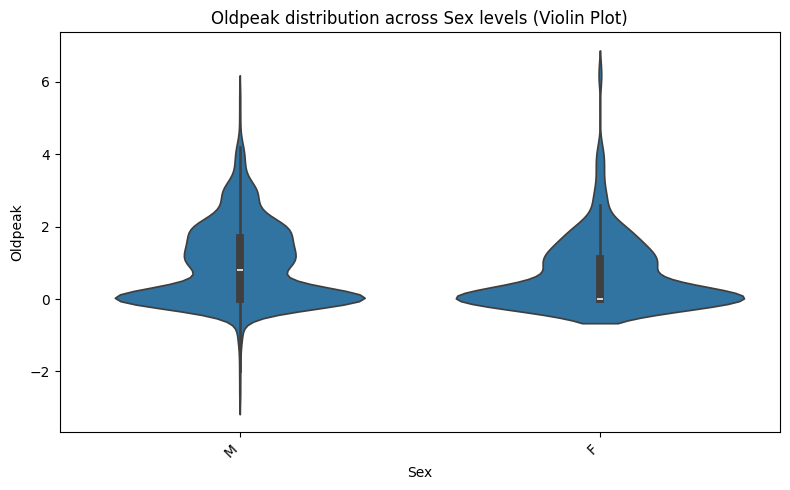

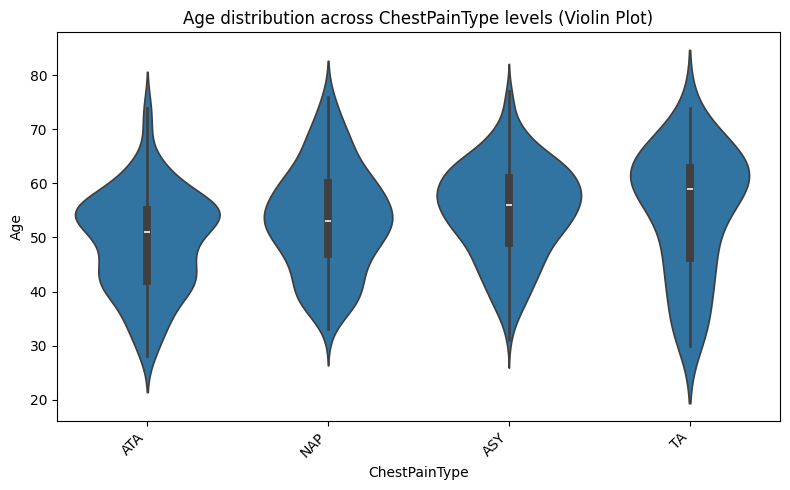

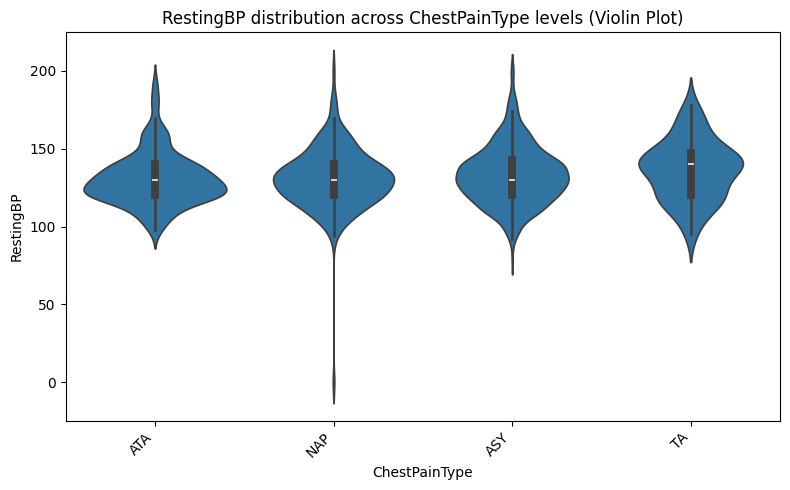

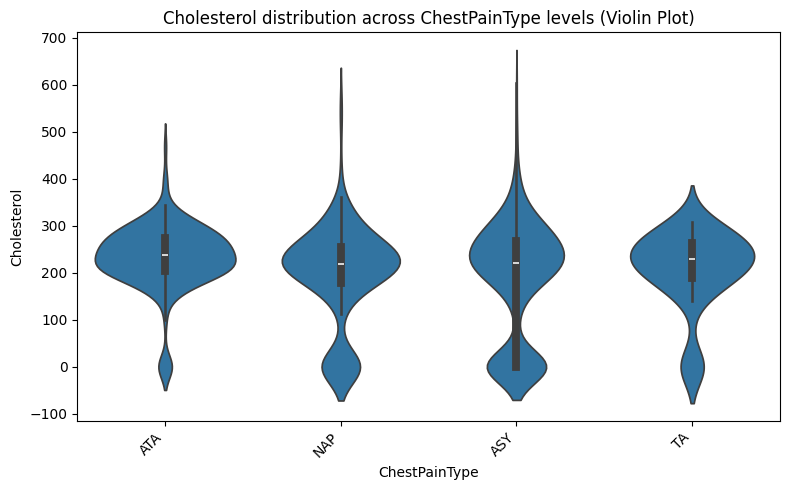

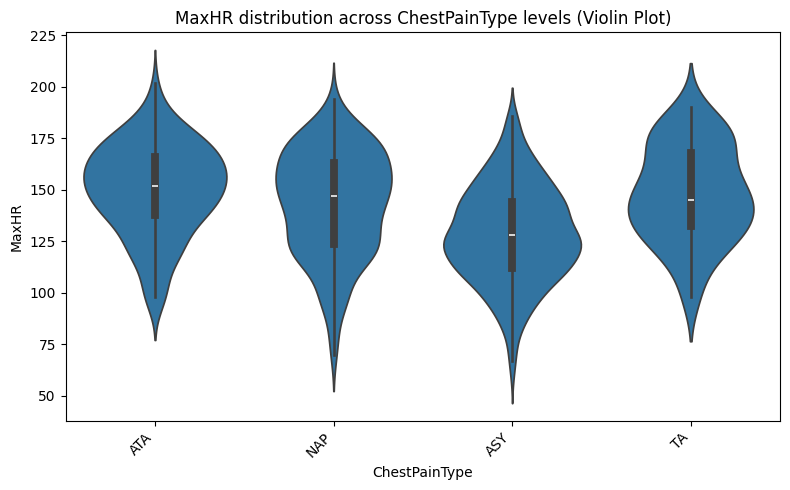

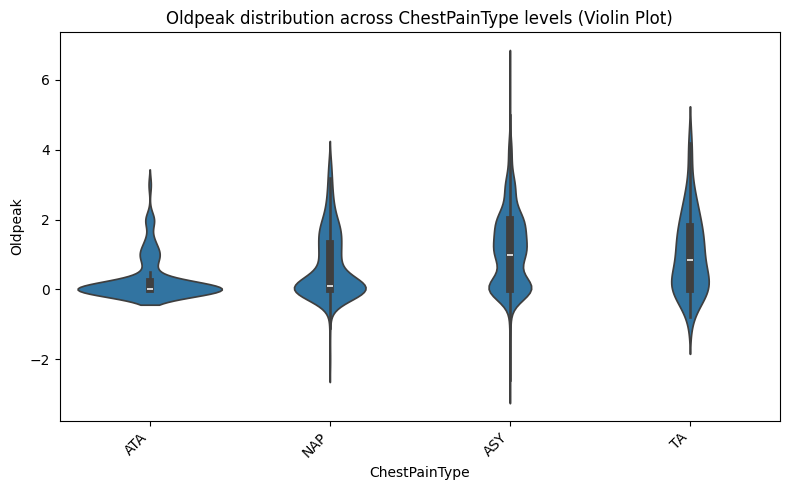

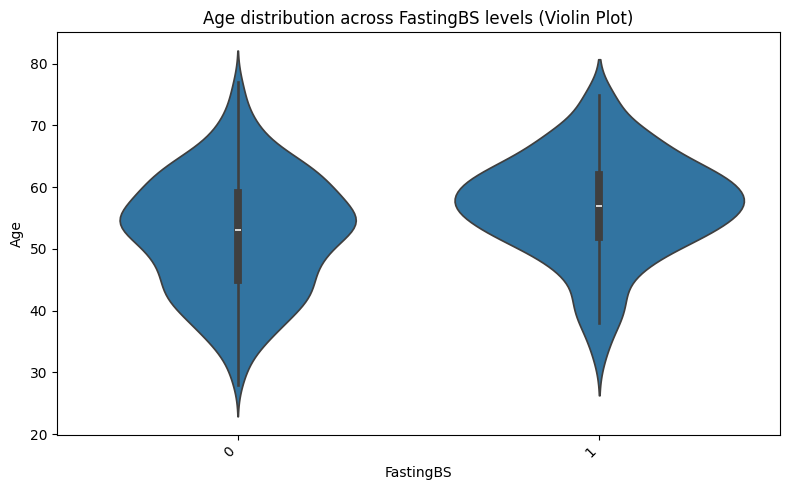

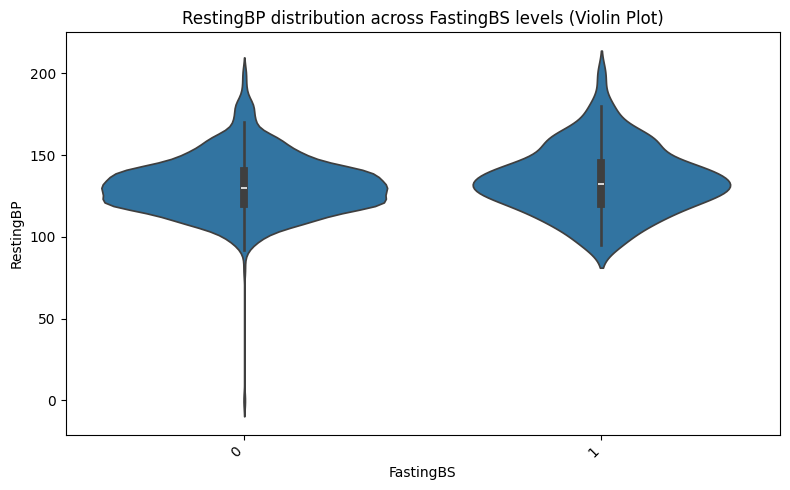

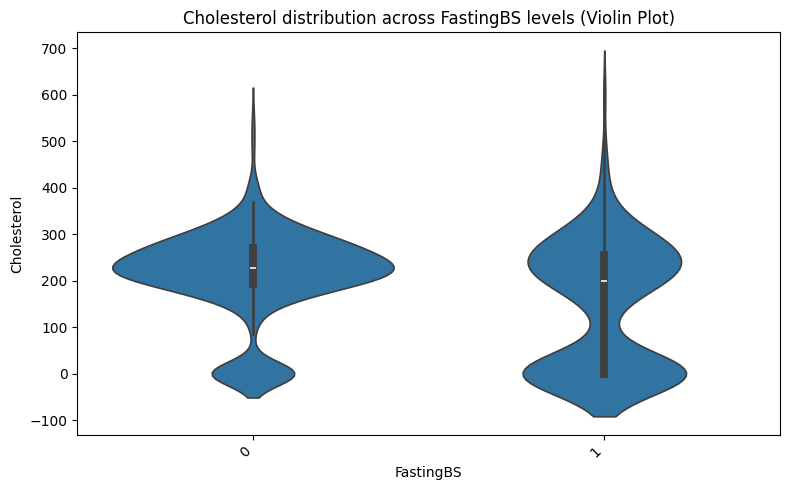

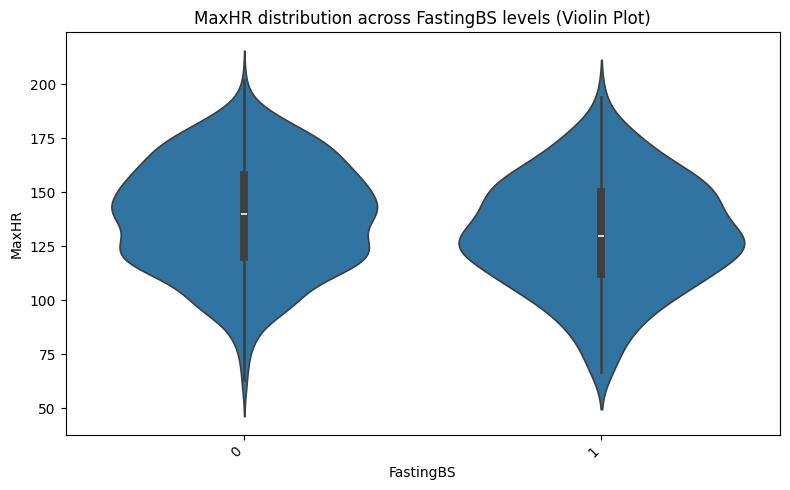

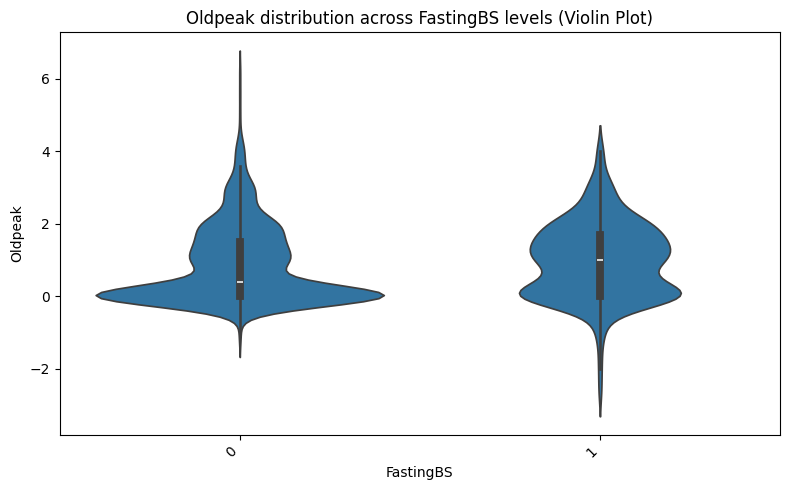

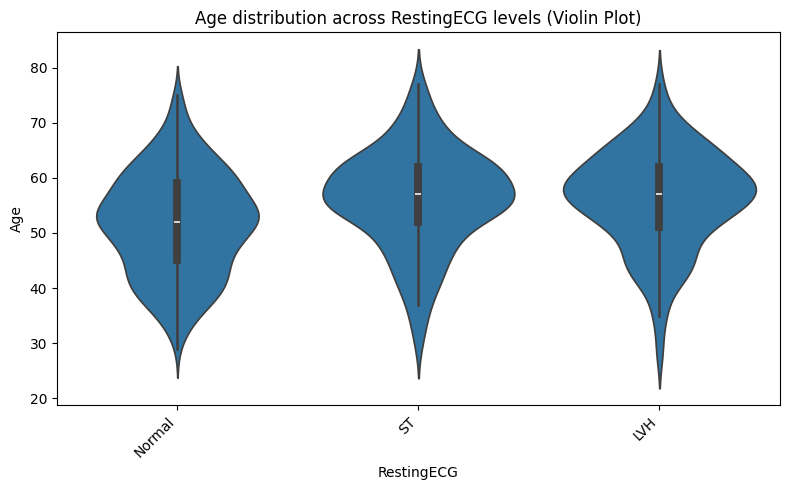

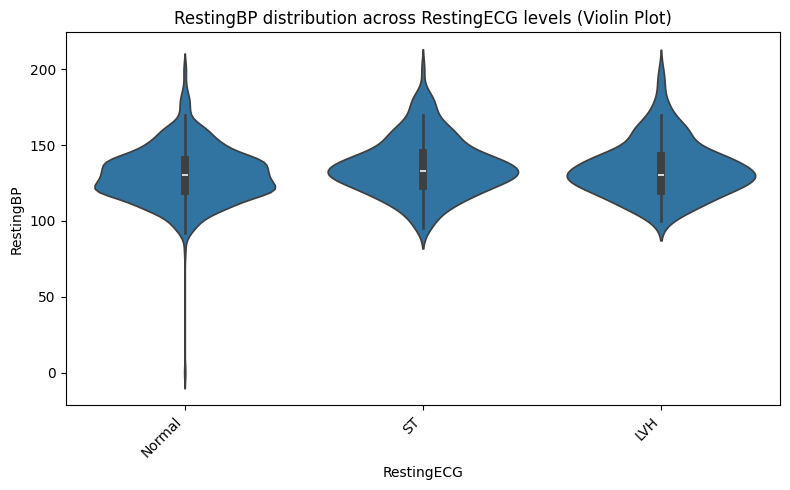

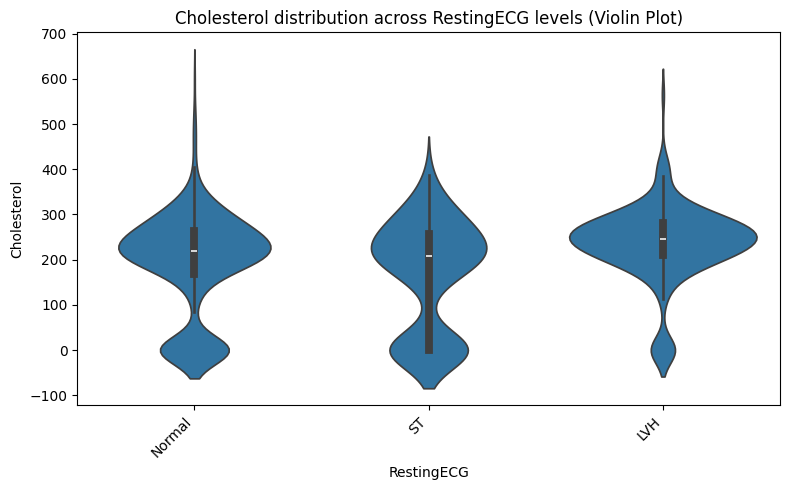

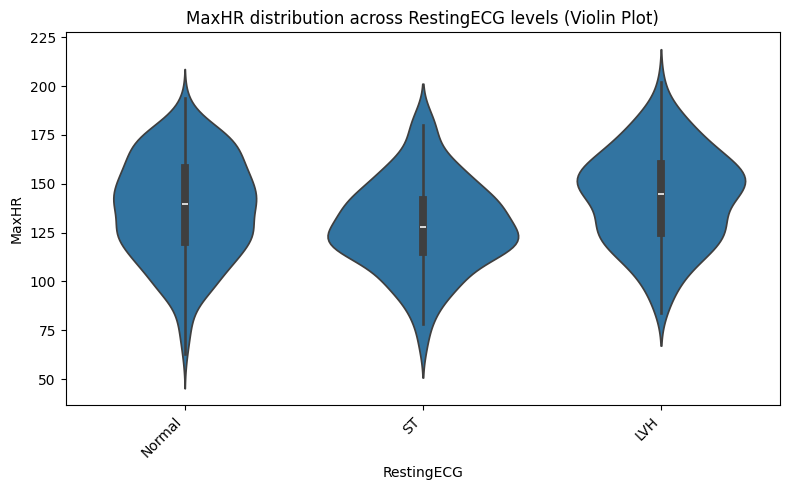

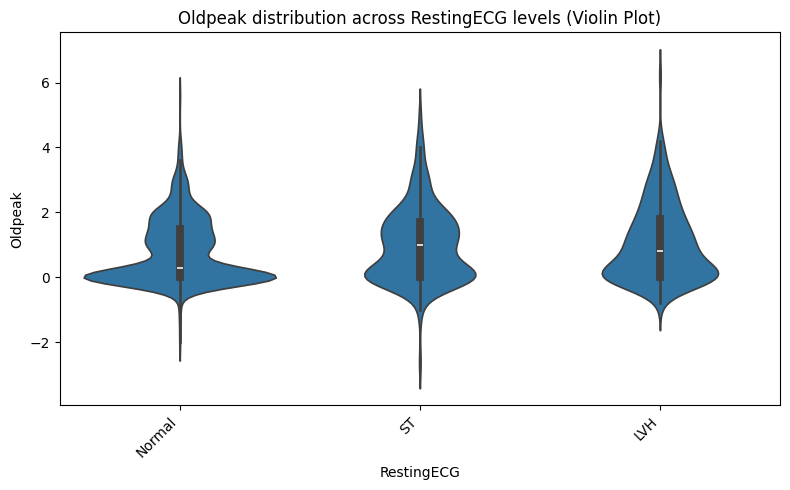

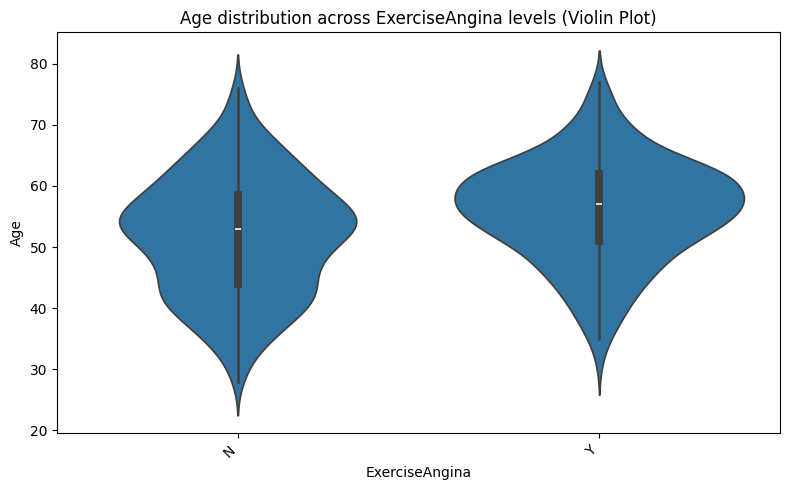

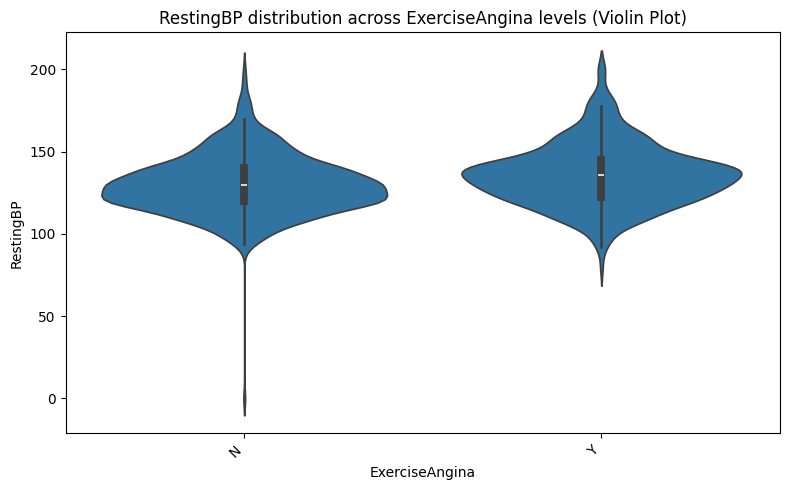

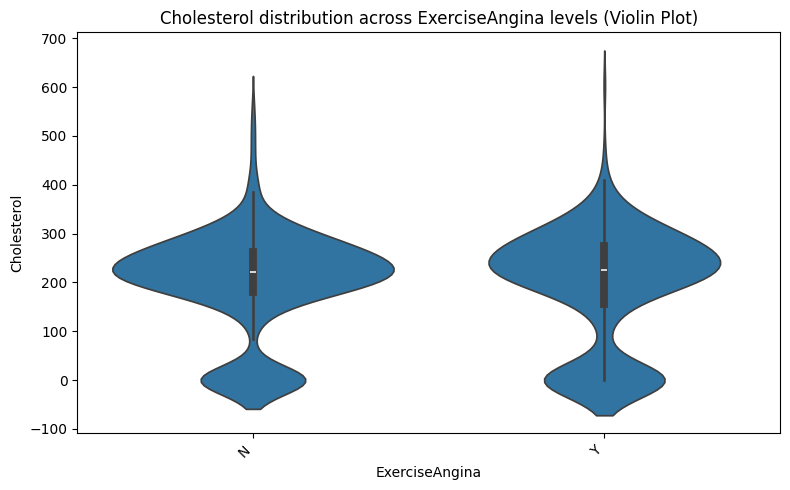

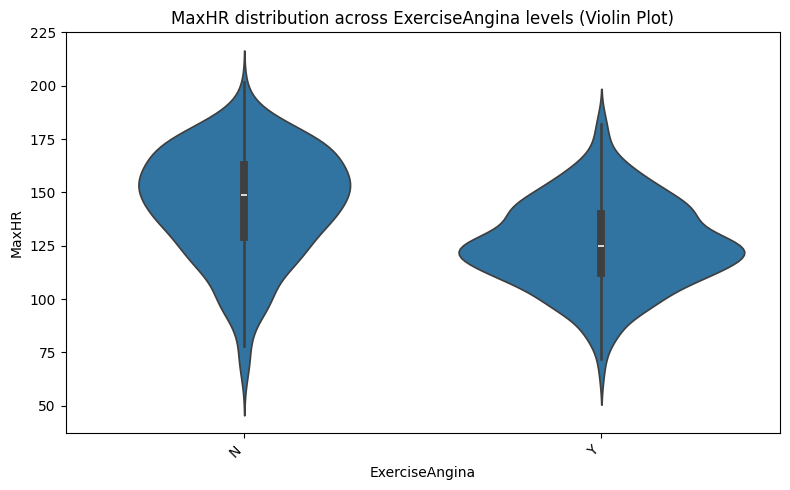

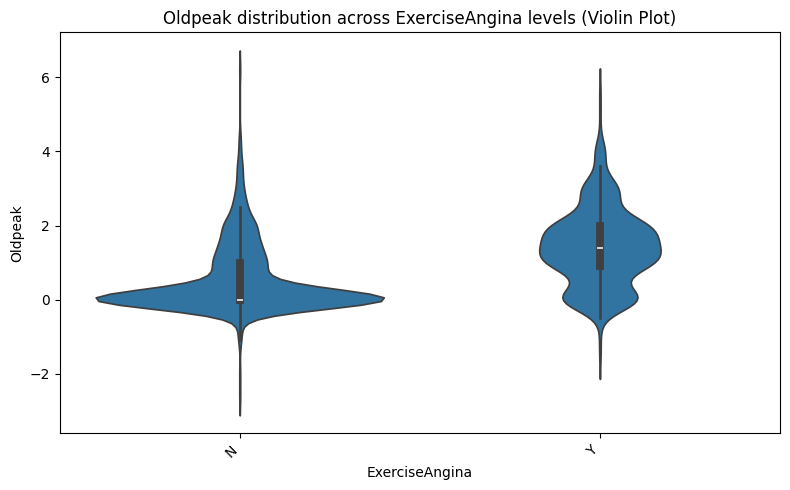

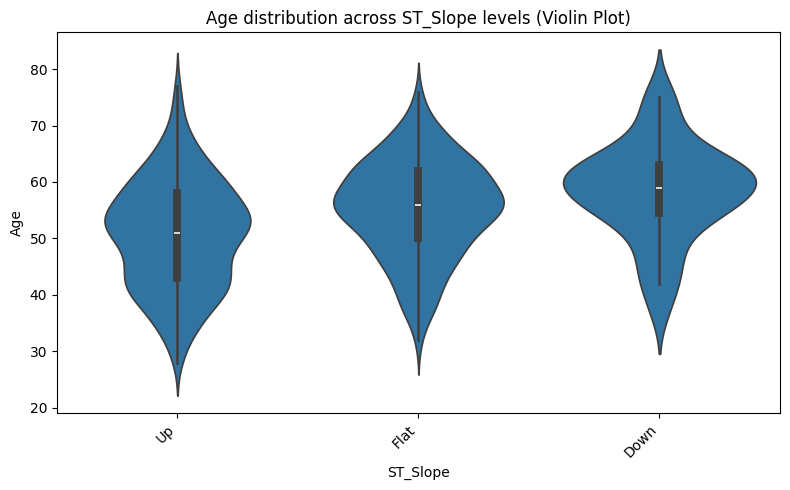

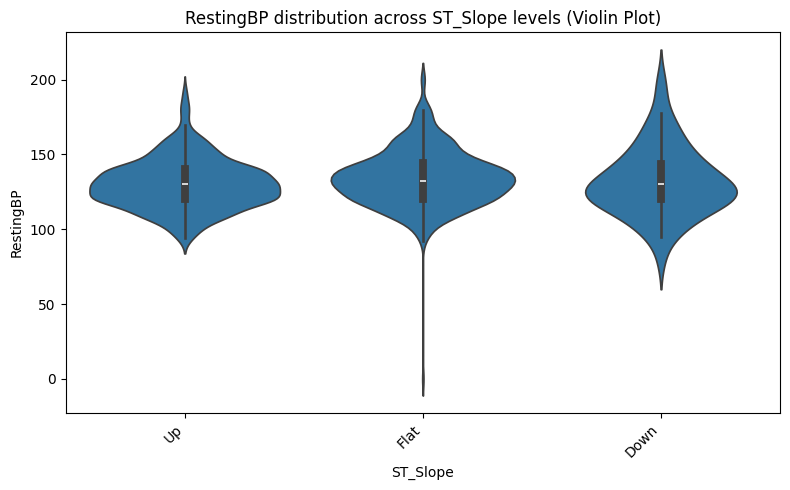

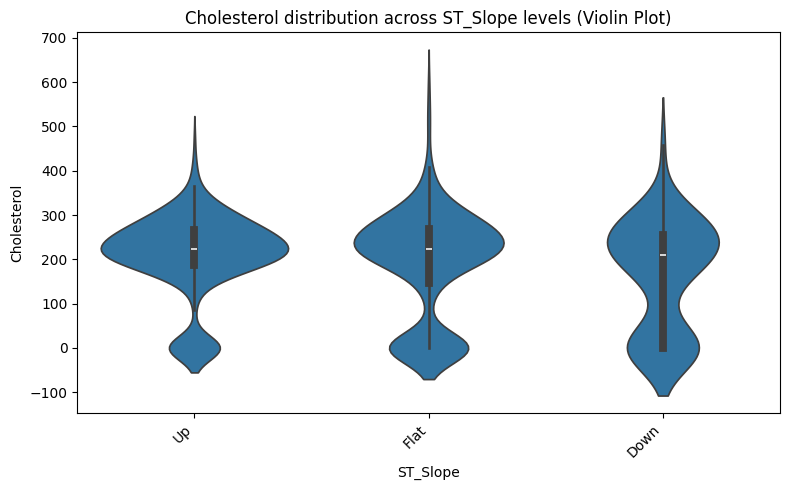

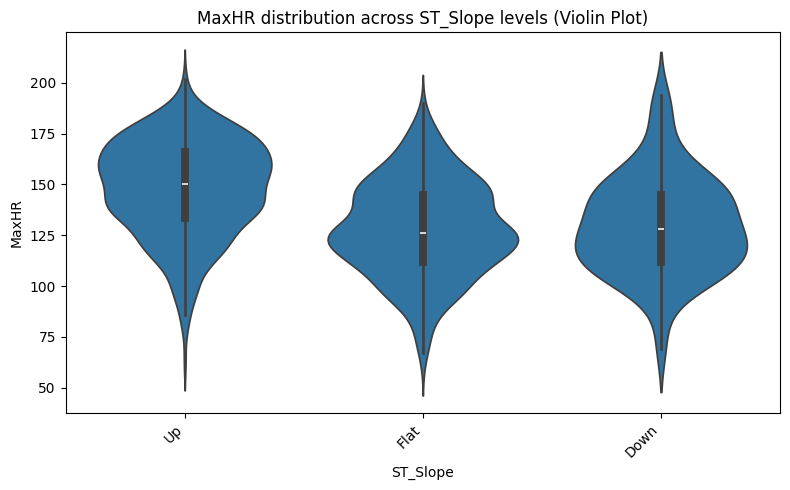

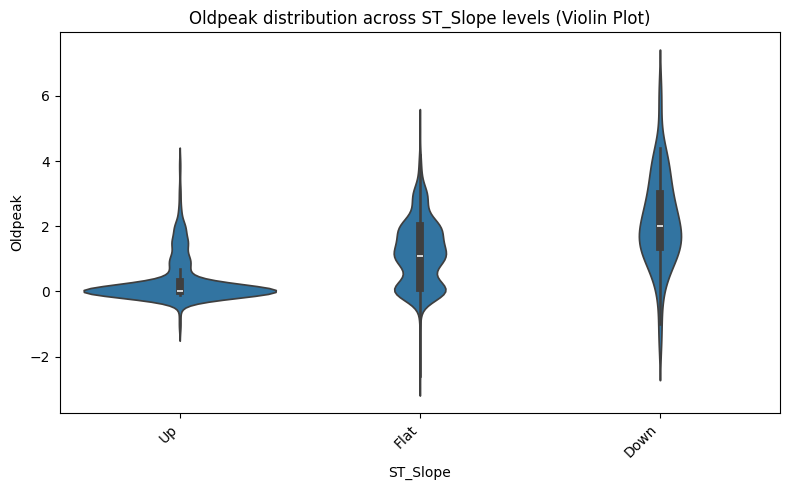

In [ ]:
# Violin plot for each numerical variable across levels of categorical variables
for cat_col in categorical_cols[:-1]: # Exclude 'HeartDisease'
    for num_col in numerical_cols:
        plt.figure(figsize=(8, 5))
        sns.violinplot(data=df, x=cat_col, y=num_col)
        plt.title(f'{num_col} distribution across {cat_col} levels (Violin Plot)')
        plt.xticks(rotation=45, ha='right')
        plt.tight_layout()
        plt.show()


# Feature Engineering

In [ ]:
df.info()
df.head(5)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


Age Sex ChestPainType  RestingBP  Cholesterol  FastingBS RestingECG  MaxHR  \
0   40   M           ATA        140          289          0     Normal    172   
1   49   F           NAP        160          180          0     Normal    156   
2   37   M           ATA        130          283          0         ST     98   
3   48   F           ASY        138          214          0     Normal    108   
4   54   M           NAP        150          195          0     Normal    122   

  ExerciseAngina  Oldpeak ST_Slope  HeartDisease  
0              N      0.0       Up             0  
1              N      1.0     Flat             1  
2              N      0.0       Up             0  
3              Y      1.5     Flat             1  
4              N      0.0       Up             0

## Encoding

In [ ]:
from sklearn.preprocessing import LabelEncoder
df_encoded = df.copy()

# Label Encoding for ExerciseAngina (Y/N to 1/0)
encoding_ea = LabelEncoder()
df_encoded['ExerciseAngina'] = encoding_ea.fit_transform(df_encoded['ExerciseAngina'])

# One-hot Encoding for Sex, ChestPainType, RestingECG, and ST_Slope
df_encoded = pd.get_dummies(df_encoded, columns=['Sex', 'ChestPainType', 'RestingECG', 'ST_Slope'], drop_first=True)

df_encoded.head(5)

Age  RestingBP  Cholesterol  FastingBS  MaxHR  ExerciseAngina  Oldpeak  \
0   40        140          289          0    172               0      0.0   
1   49        160          180          0    156               0      1.0   
2   37        130          283          0     98               0      0.0   
3   48        138          214          0    108               1      1.5   
4   54        150          195          0    122               0      0.0   

   HeartDisease  Sex_M  ChestPainType_ATA  ChestPainType_NAP  \
0             0   True               True              False   
1             1  False              False               True   
2             0   True               True              False   
3             1  False              False              False   
4             0   True              False               True   

   ChestPainType_TA  RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  \
0             False               True          False          False   
1             False               True          False           True   
2             False              False           True          False   
3             False               True          False           True   
4             False               True          False          False   

   ST_Slope_Up  
0         True  
1        False  
2         True  
3        False  
4         True

## Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_encoded.drop('HeartDisease', axis=1))

# Create Scaling DataFrame
df_scaled = pd.DataFrame(scaled_features, columns=df_encoded.drop('HeartDisease', axis=1).columns)

# Combine with Target = HeartDisease
df_scaled['HeartDisease'] = df_encoded['HeartDisease']

df_scaled.head()

Age  RestingBP  Cholesterol  FastingBS     MaxHR  ExerciseAngina  \
0 -1.433140   0.410909     0.825070  -0.551341  1.382928       -0.823556   
1 -0.478484   1.491752    -0.171961  -0.551341  0.754157       -0.823556   
2 -1.751359  -0.129513     0.770188  -0.551341 -1.525138       -0.823556   
3 -0.584556   0.302825     0.139040  -0.551341 -1.132156        1.214246   
4  0.051881   0.951331    -0.034755  -0.551341 -0.581981       -0.823556   

    Oldpeak     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ChestPainType_TA  \
0 -0.832432  0.515952           2.075177          -0.532838         -0.229679   
1  0.105664 -1.938163          -0.481887           1.876744         -0.229679   
2 -0.832432  0.515952           2.075177          -0.532838         -0.229679   
3  0.574711 -1.938163          -0.481887          -0.532838         -0.229679   
4 -0.832432  0.515952          -0.481887           1.876744         -0.229679   

   RestingECG_Normal  RestingECG_ST  ST_Slope_Flat  ST_Slope_Up  HeartDisease  
0           0.814275      -0.490449      -1.002181     1.150674             0  
1           0.814275      -0.490449       0.997824    -0.869056             1  
2          -1.228087       2.038947      -1.002181     1.150674             0  
3           0.814275      -0.490449       0.997824    -0.869056             1  
4           0.814275      -0.490449      -1.002181     1.150674             0

## Feature Interaction & Polynomial Features

In [ ]:
from sklearn.preprocessing import PolynomialFeatures

poly = PolynomialFeatures(degree=2, interaction_only=True, include_bias=False)
poly_features = poly.fit_transform(df_scaled.drop('HeartDisease', axis=1))
df_poly = pd.DataFrame(poly_features, columns=poly.get_feature_names_out(df_scaled.drop('HeartDisease', axis=1).columns))

# Reattach target
df_poly['HeartDisease'] = df_scaled['HeartDisease']

df_poly.head(5)

Age  RestingBP  Cholesterol  FastingBS     MaxHR  ExerciseAngina  \
0 -1.433140   0.410909     0.825070  -0.551341  1.382928       -0.823556   
1 -0.478484   1.491752    -0.171961  -0.551341  0.754157       -0.823556   
2 -1.751359  -0.129513     0.770188  -0.551341 -1.525138       -0.823556   
3 -0.584556   0.302825     0.139040  -0.551341 -1.132156        1.214246   
4  0.051881   0.951331    -0.034755  -0.551341 -0.581981       -0.823556   

    Oldpeak     Sex_M  ChestPainType_ATA  ChestPainType_NAP  ...  \
0 -0.832432  0.515952           2.075177          -0.532838  ...   
1  0.105664 -1.938163          -0.481887           1.876744  ...   
2 -0.832432  0.515952           2.075177          -0.532838  ...   
3  0.574711 -1.938163          -0.481887          -0.532838  ...   
4 -0.832432  0.515952          -0.481887           1.876744  ...   

   ChestPainType_TA RestingECG_ST  ChestPainType_TA ST_Slope_Flat  \
0                        0.112646                        0.230180   
1                        0.112646                       -0.229179   
2                       -0.468303                        0.230180   
3                        0.112646                       -0.229179   
4                        0.112646                        0.230180   

   ChestPainType_TA ST_Slope_Up  RestingECG_Normal RestingECG_ST  \
0                     -0.264285                        -0.399361   
1                      0.199604                        -0.399361   
2                     -0.264285                        -2.504003   
3                      0.199604                        -0.399361   
4                     -0.264285                        -0.399361   

   RestingECG_Normal ST_Slope_Flat  RestingECG_Normal ST_Slope_Up  \
0                        -0.816051                       0.936965   
1                         0.812503                      -0.707650   
2                         1.230765                      -1.413127   
3                         0.812503                      -0.707650   
4                        -0.816051                       0.936965   

   RestingECG_ST ST_Slope_Flat  RestingECG_ST ST_Slope_Up  \
0                     0.491519                  -0.564347   
1                    -0.489382                   0.426228   
2                    -2.043394                   2.346163   
3                    -0.489382                   0.426228   
4                     0.491519                  -0.564347   

   ST_Slope_Flat ST_Slope_Up  HeartDisease  
0                  -1.153184             0  
1                  -0.867165             1  
2                  -1.153184             0  
3                  -0.867165             1  
4                  -1.153184             0  

[5 rows x 121 columns]

## Dimensionality Reduction

In [ ]:
# PCA was applied to df_poly to reduce dimensionality, as polynomial and interaction features generated a very large number of columns. This helps improve model efficiency and reduce overfitting.

# Reduce dimensions using PCA (keep 95% variance)
from sklearn.decomposition import PCA
pca = PCA(n_components=0.95, random_state=42)
pca_features = pca.fit_transform(df_poly.drop('HeartDisease', axis=1))
df_pca = pd.DataFrame(pca_features)
df_pca['HeartDisease'] = df_poly['HeartDisease']

df_pca.head(5)

0         1         2         3         4         5         6  \
0  6.322734  3.021659 -1.107161  2.182755  2.281846  1.991328 -1.885272   
1 -1.967346 -0.850763 -0.635690  0.695122  0.914434  0.508111  1.028660   
2 -0.748768  4.928107 -0.554728  0.764589 -0.781028  2.989718  1.605188   
3 -2.422388 -0.143341  0.037987  1.645422 -1.574004  1.226012 -0.758519   
4 -1.145500 -1.321513  1.280162  0.878079  3.079070 -0.080022  0.354768   

          7         8         9  ...        72        73        74        75  \
0 -1.125598 -0.140313  2.089537  ... -0.240035  0.335403  0.013350  0.003115   
1 -0.929173  0.150988 -1.497429  ... -0.234914 -0.118430  0.008559 -0.098059   
2 -0.929321  0.181544 -2.145955  ...  0.844022 -0.925121  1.076228 -1.101256   
3 -1.541316 -1.419970  1.532431  ...  0.601572  0.156874  0.187192 -0.238233   
4 -0.783783 -0.135003  0.501423  ... -0.167806  0.146825 -0.024330  0.257467   

         76        77        78        79        80  HeartDisease  
0 -0.172629  0.029247  0.012151 -0.385062  0.051707             0  
1  0.133452 -0.647813 -0.524791  0.122050 -0.101935             1  
2  0.483926 -0.400169  0.488065  0.366415  1.028961             0  
3  0.439774  0.152679  1.100171  0.049575 -0.827525             1  
4  0.096861 -0.046510 -0.084486 -0.007920 -0.125207             0  

[5 rows x 82 columns]

In [ ]:
print("Number of PCA components retained:", pca.n_components_)

Number of PCA components retained: 81


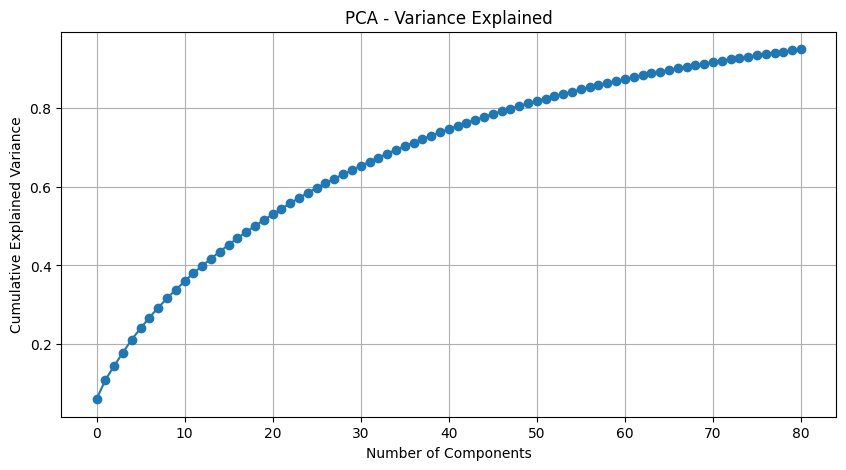

In [ ]:
plt.figure(figsize=(10, 5))
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance')
plt.title('PCA - Variance Explained')
plt.grid(True)
plt.show()

## Feature Selection

In [ ]:
# Feature Selection Using df_pca

# Select best 10 features using ANOVA F-test
from sklearn.feature_selection import SelectKBest, f_classif
X = df_pca.drop('HeartDisease', axis=1)
y = df_pca['HeartDisease']
selector = SelectKBest(score_func=f_classif, k=10)
X_new1 = selector.fit_transform(X, y)

df_pca_selected_features = X.columns[selector.get_support()]
print("Selected Features:", df_pca_selected_features)

Selected Features: Index([0, 1, 2, 3, 4, 6, 7, 8, 10, 15], dtype='object')


In [ ]:
# Feature Selection Using df_scaled

# Select best 10 features using ANOVA F-test
X = df_scaled.drop('HeartDisease', axis=1)
y = df_scaled['HeartDisease']
selector = SelectKBest(score_func=f_classif, k=10)
X_new2 = selector.fit_transform(X, y)

df_scaled_selected_features = X.columns[selector.get_support()]
print("Selected Features:", df_scaled_selected_features)

Selected Features: Index(['Age', 'Cholesterol', 'FastingBS', 'MaxHR', 'ExerciseAngina', 'Oldpeak',
       'Sex_M', 'ChestPainType_ATA', 'ST_Slope_Flat', 'ST_Slope_Up'],
      dtype='object')


In [ ]:
# Final DataFrame with selected features
df_pca_final = pd.DataFrame(X_new1, columns=df_pca_selected_features)
df_pca_final['HeartDisease'] = y

df_scaled_final = pd.DataFrame(X_new2, columns=df_scaled_selected_features)
df_scaled_final['HeartDisease'] = y

In [ ]:
df_pca_final

0         1         2         3         4         6         7  \
0    6.322734  3.021659 -1.107161  2.182755  2.281846 -1.885272 -1.125598   
1   -1.967346 -0.850763 -0.635690  0.695122  0.914434  1.028660 -0.929173   
2   -0.748768  4.928107 -0.554728  0.764589 -0.781028  1.605188 -0.929321   
3   -2.422388 -0.143341  0.037987  1.645422 -1.574004 -0.758519 -1.541316   
4   -1.145500 -1.321513  1.280162  0.878079  3.079070  0.354768 -0.783783   
..        ...       ...       ...       ...       ...       ...       ...   
913 -1.992897 -0.545929 -1.492263  1.025729  0.085883  1.582604 -0.560429   
914 -0.647409  0.884589  1.319596 -1.841138 -1.351099  0.715840  1.792065   
915 -1.833896  1.298576  0.695104 -0.945790 -1.237196 -1.225421 -0.328751   
916 -0.766493  1.534597 -1.022043  0.497790  0.103136  0.954133  0.741970   
917  0.979890 -2.156936  5.099364  0.313689  4.719802 -0.806522 -0.818877   

            8        10        15  HeartDisease  
0   -0.140313  1.448468 -0.553026             0  
1    0.150988 -0.040067 -0.918644             1  
2    0.181544  2.282435  3.839787             0  
3   -1.419970  0.343181 -0.499331             1  
4   -0.135003 -0.648648 -0.049540             0  
..        ...       ...       ...           ...  
913 -0.081880 -1.094922 -0.117082             1  
914 -0.341108  0.445591 -2.162938             1  
915 -1.201329  0.388488 -0.038391             1  
916 -0.127133 -0.284241 -1.231660             1  
917  0.665091  1.475874 -0.072496             0  

[918 rows x 11 columns]

In [ ]:
df_scaled_final

Age  Cholesterol  FastingBS     MaxHR  ExerciseAngina   Oldpeak  \
0   -1.433140     0.825070  -0.551341  1.382928       -0.823556 -0.832432   
1   -0.478484    -0.171961  -0.551341  0.754157       -0.823556  0.105664   
2   -1.751359     0.770188  -0.551341 -1.525138       -0.823556 -0.832432   
3   -0.584556     0.139040  -0.551341 -1.132156        1.214246  0.574711   
4    0.051881    -0.034755  -0.551341 -0.581981       -0.823556 -0.832432   
..        ...          ...        ...       ...             ...       ...   
913 -0.902775     0.596393  -0.551341 -0.188999       -0.823556  0.293283   
914  1.536902    -0.053049   1.813758  0.164684       -0.823556  2.357094   
915  0.370100    -0.620168  -0.551341 -0.857069        1.214246  0.293283   
916  0.370100     0.340275  -0.551341  1.461525       -0.823556 -0.832432   
917 -1.645286    -0.217696  -0.551341  1.422226       -0.823556 -0.832432   

        Sex_M  ChestPainType_ATA  ST_Slope_Flat  ST_Slope_Up  HeartDisease  
0    0.515952           2.075177      -1.002181     1.150674             0  
1   -1.938163          -0.481887       0.997824    -0.869056             1  
2    0.515952           2.075177      -1.002181     1.150674             0  
3   -1.938163          -0.481887       0.997824    -0.869056             1  
4    0.515952          -0.481887      -1.002181     1.150674             0  
..        ...                ...            ...          ...           ...  
913  0.515952          -0.481887       0.997824    -0.869056             1  
914  0.515952          -0.481887       0.997824    -0.869056             1  
915  0.515952          -0.481887       0.997824    -0.869056             1  
916 -1.938163           2.075177       0.997824    -0.869056             1  
917  0.515952          -0.481887      -1.002181     1.150674             0  

[918 rows x 11 columns]

# Data Training and ML Methods Evaluation

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report

## Data Splitting

In [ ]:
#Data Splitting
#X1 and y1 for dc_pca_final
X1 = df_pca_final.drop(columns=['HeartDisease'])
y1 = df_pca_final['HeartDisease']

X1_train, X1_test, y1_train, y1_test = train_test_split(
    X1, y1, test_size=0.2, random_state=42)

print(len(X1_train))
print(len(y1_train))
print(len(X1_test))
print(len(y1_test))


#X2 and y2 for df_scaled_final
X2 = df_scaled_final.drop(columns=['HeartDisease'])
y2 = df_scaled_final['HeartDisease']

X2_train, X2_test, y2_train, y2_test = train_test_split(
    X2, y2, test_size=0.2, random_state=42)

print(len(X2_train))
print(len(y2_train))
print(len(X2_test))
print(len(y2_test))

734
734
184
184
734
734
184
184


## Model Building & Model Evaluation

Models were built and evaluated using both datasets:
- df_scaled_final (standardized features)
- df_poly_final (polynomial interaction features with PCA)
This was done to compare the performance impact of interaction-based feature expansion versus feature scaling only.

### Logistic Regression

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model1 = LogisticRegression(max_iter=1000)
log_model1.fit(X1_train, y1_train)
y_log_pred1 = log_model1.predict(X1_test)
print(classification_report(y1_test, y_log_pred1))

log_model2 = LogisticRegression(max_iter=1000)
log_model2.fit(X2_train, y2_train)
y_log_pred2 = log_model2.predict(X2_test)
print(classification_report(y2_test, y_log_pred2))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84        77
           1       0.93      0.81      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.86      0.85      0.85       184

              precision    recall  f1-score   support

           0       0.77      0.84      0.81        77
           1       0.88      0.82      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184



Logistic Regression With Hyperparameter Tuning (Grid Search)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

param_grid = [
    {
        'penalty': ['l1'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'saga']
    },
    {
        'penalty': ['l2'],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear', 'lbfgs', 'sag', 'saga', 'newton-cg']
    },
    {
        'penalty': ['elasticnet'],
        'C': [0.01, 0.1, 1, 10],
        'l1_ratio': [0.5, 0.7],
        'solver': ['saga']
    },
    {
        'penalty': [None],
        'C': [0.01, 0.1, 1, 10],
        'solver': ['lbfgs', 'newton-cg']
    }
]

clf1 = GridSearchCV(log_model1, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
best_clf1 = clf1.fit(X1_train, y1_train)
y_pred1 = best_clf1.best_estimator_.predict(X1_test)
print("Best Estimator (X1):", clf1.best_estimator_)
print(classification_report(y1_test, y_pred1))

clf2 = GridSearchCV(log_model2, param_grid=param_grid, cv=3, verbose=1, n_jobs=-1)
best_clf2 = clf2.fit(X2_train, y2_train)
y_pred2 = best_clf2.best_estimator_.predict(X2_test)
print("Best Estimator (X2):", clf2.best_estimator_)
print(classification_report(y2_test, y_pred2))

Fitting 3 folds for each of 44 candidates, totalling 132 fits
Best Estimator (X1): LogisticRegression(C=0.01, max_iter=1000, solver='liblinear')
              precision    recall  f1-score   support

           0       0.79      0.91      0.84        77
           1       0.93      0.82      0.87       107

    accuracy                           0.86       184
   macro avg       0.86      0.87      0.86       184
weighted avg       0.87      0.86      0.86       184

Fitting 3 folds for each of 44 candidates, totalling 132 fits
Best Estimator (X2): LogisticRegression(C=1, max_iter=1000, penalty='l1', solver='saga')
              precision    recall  f1-score   support

           0       0.77      0.84      0.81        77
           1       0.88      0.82      0.85       107

    accuracy                           0.83       184
   macro avg       0.83      0.83      0.83       184
weighted avg       0.84      0.83      0.83       184



### KNN

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

knn1 = KNeighborsClassifier(n_neighbors=5)
knn1_model = knn1.fit(X1_train.values, y1_train)
y_knn_pred1 = knn1_model.predict(X1_test.values)
print(classification_report(y1_test, y_knn_pred1))

knn2 = KNeighborsClassifier(n_neighbors=5)
knn2_model = knn2.fit(X2_train.values, y2_train)
y_knn_pred2 = knn2_model.predict(X2_test.values)
print(classification_report(y2_test, y_knn_pred2))

              precision    recall  f1-score   support

           0       0.78      0.86      0.81        77
           1       0.89      0.82      0.85       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184

              precision    recall  f1-score   support

           0       0.81      0.86      0.84        77
           1       0.89      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



KNN With Hyperparameter Tuning (Grid Search)

In [ ]:
param_grid_knn = {
    'n_neighbors': list(range(3, 11)),
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan']
}

grid_search_knn1 = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, n_jobs=-1, verbose=1)
grid_search_knn1.fit(X1_train, y1_train)
best_knn1 = grid_search_knn1.best_estimator_
y_pred_knn1 = best_knn1.predict(X1_test)
print("Best Parameters (X1):", grid_search_knn1.best_params_)
print(classification_report(y1_test, y_pred_knn1))

grid_search_knn2 = GridSearchCV(KNeighborsClassifier(), param_grid_knn, cv=3, n_jobs=-1, verbose=1)
grid_search_knn2.fit(X2_train, y2_train)
best_knn2 = grid_search_knn2.best_estimator_
y_pred_knn2 = best_knn2.predict(X2_test)
print("Best Parameters (X2):", grid_search_knn2.best_params_)
print(classification_report(y2_test, y_pred_knn2))

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters (X1): {'metric': 'euclidean', 'n_neighbors': 7, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.78      0.88      0.83        77
           1       0.91      0.82      0.86       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Fitting 3 folds for each of 32 candidates, totalling 96 fits
Best Parameters (X2): {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
              precision    recall  f1-score   support

           0       0.82      0.87      0.84        77
           1       0.90      0.86      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.87      0.86      0.86       184



### Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf1 = RandomForestClassifier(random_state=42)
rf1.fit(X1_train, y1_train)
y_rf_pred1 = rf1.predict(X1_test)
print(classification_report(y1_test, y_rf_pred1))

rf2 = RandomForestClassifier(random_state=42)
rf2.fit(X2_train, y2_train)
y_rf_pred2 = rf2.predict(X2_test)
print(classification_report(y2_test, y_rf_pred2))

              precision    recall  f1-score   support

           0       0.78      0.84      0.81        77
           1       0.88      0.83      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184

              precision    recall  f1-score   support

           0       0.81      0.83      0.82        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



Random Forest With Hyperparameter Tuning (Grid Search)

In [ ]:
param_grid_rf = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
    'min_samples_leaf': [1, 2],
    'max_features': ['sqrt', 'log2'],
    'bootstrap': [True, False]
}

grid_search_rf1 = GridSearchCV(rf1, param_grid_rf, cv=3, verbose=1, n_jobs=-1)
grid_search_rf1.fit(X1_train, y1_train)
best_rf1 = grid_search_rf1.best_estimator_
y_pred_rf1 = best_rf1.predict(X1_test)
print("Best Parameters (X1):", grid_search_rf1.best_params_)
print(classification_report(y1_test, y_pred_rf1))

grid_search_rf2 = GridSearchCV(rf2, param_grid_rf, cv=3, verbose=1, n_jobs=-1)
grid_search_rf2.fit(X2_train, y2_train)
best_rf2 = grid_search_rf2.best_estimator_
y_pred_rf2 = best_rf2.predict(X2_test)
("Best Parameters (X2):", grid_search_rf2.best_params_)
print(classification_report(y2_test, y_pred_rf2))

Fitting 3 folds for each of 96 candidates, totalling 288 fits
Best Parameters (X1): {'bootstrap': True, 'max_depth': None, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 5, 'n_estimators': 200}
              precision    recall  f1-score   support

           0       0.81      0.87      0.84        77
           1       0.90      0.85      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184

Fitting 3 folds for each of 96 candidates, totalling 288 fits
              precision    recall  f1-score   support

           0       0.83      0.84      0.84        77
           1       0.89      0.88      0.88       107

    accuracy                           0.86       184
   macro avg       0.86      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



### Naïve Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

nb1 = GaussianNB()
nb1.fit(X1_train, y1_train)
y_nb_pred1 = nb1.predict(X1_test)
print(classification_report(y1_test, y_nb_pred1))

nb2 = GaussianNB()
nb2.fit(X2_train, y2_train)
y_nb_pred2 = nb2.predict(X2_test)
print(classification_report(y2_test, y_nb_pred2))


              precision    recall  f1-score   support

           0       0.86      0.83      0.85        77
           1       0.88      0.91      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        77
           1       0.88      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



Naïve Bayes With Hyperparameter Tuning (Grid Search)

In [ ]:
param_grid_nb = {
    'var_smoothing': np.logspace(-12, -6, 7)  # dari 1e-12 ke 1e-6
}

grid_search_nb1 = GridSearchCV(nb1, param_grid_nb, cv=3, verbose=1, n_jobs=-1)
grid_search_nb1.fit(X1_train, y1_train)
best_nb1 = grid_search_nb1.best_estimator_
y_pred_nb1 = best_nb1.predict(X1_test)
print("Best var_smoothing (X1):", grid_search_nb1.best_params_)
print(classification_report(y1_test, y_pred_nb1))

grid_search_nb2 = GridSearchCV(nb2, param_grid_nb, cv=3, verbose=1, n_jobs=-1)
grid_search_nb2.fit(X2_train, y2_train)
best_nb2 = grid_search_nb2.best_estimator_
y_pred_nb2 = best_nb2.predict(X2_test)
print("Best var_smoothing (X2):", grid_search_nb2.best_params_)
print(classification_report(y2_test, y_pred_nb2))

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best var_smoothing (X1): {'var_smoothing': np.float64(1e-12)}
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        77
           1       0.88      0.91      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184

Fitting 3 folds for each of 7 candidates, totalling 21 fits
Best var_smoothing (X2): {'var_smoothing': np.float64(1e-12)}
              precision    recall  f1-score   support

           0       0.80      0.84      0.82        77
           1       0.88      0.85      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.84       184
weighted avg       0.85      0.85      0.85       184



### Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report, accuracy_score, f1_score

dt1 = DecisionTreeClassifier(random_state=42)
dt1.fit(X1_train, y1_train)
y_dt_pred1 = dt1.predict(X1_test)
print(classification_report(y1_test, y_dt_pred1))

dt2 = DecisionTreeClassifier(random_state=42)
dt2.fit(X2_train, y2_train)
y_dt_pred2 = dt2.predict(X2_test)
print(classification_report(y2_test, y_dt_pred2))


              precision    recall  f1-score   support

           0       0.67      0.82      0.74        77
           1       0.84      0.71      0.77       107

    accuracy                           0.76       184
   macro avg       0.76      0.76      0.75       184
weighted avg       0.77      0.76      0.76       184

              precision    recall  f1-score   support

           0       0.74      0.79      0.77        77
           1       0.84      0.80      0.82       107

    accuracy                           0.80       184
   macro avg       0.79      0.80      0.80       184
weighted avg       0.80      0.80      0.80       184



Decision Tree With Hyperparameter Tuning (Grid Search)

In [ ]:
from sklearn.tree import DecisionTreeClassifier

param_grid_dt = {
    'max_depth': [None, 5, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': [None, 'sqrt', 'log2']
}

grid_search_dt1 = GridSearchCV(dt1, param_grid=param_grid_dt, cv=3, verbose=1, n_jobs=-1)
grid_search_dt1.fit(X1_train, y1_train)
best_dt1 = grid_search_dt1.best_estimator_
y_pred_dt1 = best_dt1.predict(X1_test)
print("Best Parameters (X1):", grid_search_dt1.best_params_)
print(classification_report(y1_test, y_pred_dt1))

grid_search_dt2 = GridSearchCV(dt2, param_grid=param_grid_dt, cv=3, verbose=1, n_jobs=-1)
grid_search_dt2.fit(X2_train, y2_train)
best_dt2 = grid_search_dt2.best_estimator_
y_pred_dt2 = best_dt2.predict(X2_test)
print("Best Parameters (X2):", grid_search_dt2.best_params_)
print(classification_report(y2_test, y_pred_dt2))


Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters (X1): {'max_depth': 5, 'max_features': None, 'min_samples_leaf': 1, 'min_samples_split': 5}
              precision    recall  f1-score   support

           0       0.79      0.83      0.81        77
           1       0.87      0.84      0.86       107

    accuracy                           0.84       184
   macro avg       0.83      0.84      0.83       184
weighted avg       0.84      0.84      0.84       184

Fitting 3 folds for each of 108 candidates, totalling 324 fits
Best Parameters (X2): {'max_depth': 5, 'max_features': 'sqrt', 'min_samples_leaf': 1, 'min_samples_split': 2}
              precision    recall  f1-score   support

           0       0.72      0.82      0.76        77
           1       0.85      0.77      0.81       107

    accuracy                           0.79       184
   macro avg       0.79      0.79      0.79       184
weighted avg       0.80      0.79      0.79       184



### SVM

In [ ]:
from sklearn.svm import SVC

svm1 = SVC(probability=True, random_state=42, class_weight='balanced')
svm1.fit(X1_train, y1_train)
y_svm_pred1 = svm1.predict(X1_test)
print(classification_report(y1_test, y_svm_pred1))

svm2 = SVC(probability=True, random_state=42, class_weight='balanced')
svm2.fit(X2_train, y2_train)
y_svm_pred2 = svm2.predict(X2_test)
print(classification_report(y2_test, y_svm_pred2))

              precision    recall  f1-score   support

           0       0.77      0.92      0.84        77
           1       0.93      0.80      0.86       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184

              precision    recall  f1-score   support

           0       0.82      0.84      0.83        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



SVM With Hyperparameter Tuning (Grid Search)

In [ ]:
param_grid_svm = [
    {'kernel': ['linear'], 'C': [0.1, 1]},
    {'kernel': ['rbf'], 'C': [0.1, 1], 'gamma': ['scale']},
    {'kernel': ['poly'], 'C': [1], 'gamma': ['scale'], 'degree': [2]}
]


grid_search_svm1 = GridSearchCV(
    estimator=svm1,
    param_grid=param_grid_svm,
    cv=3,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1
)
grid_search_svm1.fit(X1_train, y1_train)
best_svm1 = grid_search_svm1.best_estimator_
y_pred_svm1 = best_svm1.predict(X1_test)
print("Best Parameters (X1):", grid_search_svm1.best_params_)
print(classification_report(y1_test, y_pred_svm1))

grid_search_svm2 = GridSearchCV(
    estimator=svm2,
    param_grid=param_grid_svm,
    cv=3,
    scoring='f1_weighted',
    verbose=1,
    n_jobs=-1
)
grid_search_svm2.fit(X2_train, y2_train)
best_svm2 = grid_search_svm2.best_estimator_
y_pred_svm2 = best_svm2.predict(X2_test)
print("Best Parameters (X2):", grid_search_svm2.best_params_)
print(classification_report(y2_test, y_pred_svm2))


Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters (X1): {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.77      0.92      0.84        77
           1       0.93      0.80      0.86       107

    accuracy                           0.85       184
   macro avg       0.85      0.86      0.85       184
weighted avg       0.87      0.85      0.85       184

Fitting 3 folds for each of 5 candidates, totalling 15 fits
Best Parameters (X2): {'C': 1, 'gamma': 'scale', 'kernel': 'rbf'}
              precision    recall  f1-score   support

           0       0.82      0.84      0.83        77
           1       0.89      0.87      0.88       107

    accuracy                           0.86       184
   macro avg       0.85      0.86      0.86       184
weighted avg       0.86      0.86      0.86       184



### XGBoost

In [ ]:
from xgboost import XGBClassifier

xgb1 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb1.fit(X1_train, y1_train)
y_pred_xgb1 = xgb1.predict(X1_test)
y_prob_xgb1 = xgb1.predict_proba(X1_test)[:, 1]
print(classification_report(y1_test, y_pred_xgb1))

xgb2 = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb2.fit(X2_train, y2_train)
y_pred_xgb2 = xgb2.predict(X2_test)
y_prob_xgb2 = xgb2.predict_proba(X2_test)[:, 1]
print(classification_report(y2_test, y_pred_xgb2))

              precision    recall  f1-score   support

           0       0.74      0.88      0.80        77
           1       0.90      0.78      0.83       107

    accuracy                           0.82       184
   macro avg       0.82      0.83      0.82       184
weighted avg       0.83      0.82      0.82       184

              precision    recall  f1-score   support

           0       0.80      0.86      0.82        77
           1       0.89      0.84      0.87       107

    accuracy                           0.85       184
   macro avg       0.84      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184



/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:24:29] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


XGBoost With Hyperparameter Tuning (Grid Search)

In [ ]:
param_grid_xgb = {
    'n_estimators': [100, 200],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1],
    'subsample': [0.8, 1],
    'colsample_bytree': [0.8, 1],
}

grid_xgb1 = GridSearchCV(
    estimator=xgb1,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_xgb1.fit(X1_train, y1_train)
best_xgb1 = grid_xgb1.best_estimator_
y_xgb1_pred = best_xgb1.predict(X1_test)
print("Best Parameters (X1):", grid_xgb1.best_params_)
print(classification_report(y1_test, y_xgb1_pred))

grid_xgb2 = GridSearchCV(
    estimator=xgb2,
    param_grid=param_grid_xgb,
    scoring='f1',
    cv=3,
    verbose=1,
    n_jobs=-1
)
grid_xgb2.fit(X2_train, y2_train)
best_xgb2 = grid_xgb2.best_estimator_
y_xgb2_pred = best_xgb2.predict(X2_test)
print("Best Parameters (X2):", grid_xgb2.best_params_)
print(classification_report(y2_test, y_xgb2_pred))


Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:24:57] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters (X1): {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 5, 'n_estimators': 200, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.81      0.84      0.83        77
           1       0.88      0.86      0.87       107

    accuracy                           0.85       184
   macro avg       0.85      0.85      0.85       184
weighted avg       0.85      0.85      0.85       184

Fitting 3 folds for each of 48 candidates, totalling 144 fits


/usr/local/lib/python3.11/dist-packages/xgboost/core.py:158: UserWarning: [22:25:09] WARNING: /workspace/src/learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


Best Parameters (X2): {'colsample_bytree': 0.8, 'learning_rate': 0.01, 'max_depth': 7, 'n_estimators': 100, 'subsample': 0.8}
              precision    recall  f1-score   support

           0       0.86      0.83      0.85        77
           1       0.88      0.91      0.89       107

    accuracy                           0.88       184
   macro avg       0.87      0.87      0.87       184
weighted avg       0.87      0.88      0.87       184



## Evaluation Comparison

Evaluation Comparison Between All Models

                          Model  Accuracy  F1-score
16                DT (Poly-PCA)  0.755435  0.771574
19       DT Tuned (Scaled Only)  0.788043  0.807882
17             DT (Scaled Only)  0.798913  0.822967
24           XGBoost (Poly-PCA)  0.820652  0.834171
1          LogReg (Scaled Only)  0.831522  0.850242
3    LogReg Tuned (Scaled Only)  0.831522  0.850242
4                KNN (Poly-PCA)  0.836957  0.854369
8                 RF (Poly-PCA)  0.836957  0.855769
18          DT Tuned (Poly-PCA)  0.836957  0.857143
6          KNN Tuned (Poly-PCA)  0.847826  0.862745
20               SVM (Poly-PCA)  0.853261  0.864322
22         SVM Tuned (Poly-PCA)  0.853261  0.864322
25        XGBoost (Scaled Only)  0.847826  0.865385
0             LogReg (Poly-PCA)  0.853261  0.865672
13            NB ((Scaled Only)  0.847826  0.866667
15       NB Tuned (Scaled Only)  0.847826  0.866667
9              RF (Scaled Only)  0.847826  0.867925
2       LogReg Tuned (Poly-PCA)  0.858696  0.871287
26     XGBoo

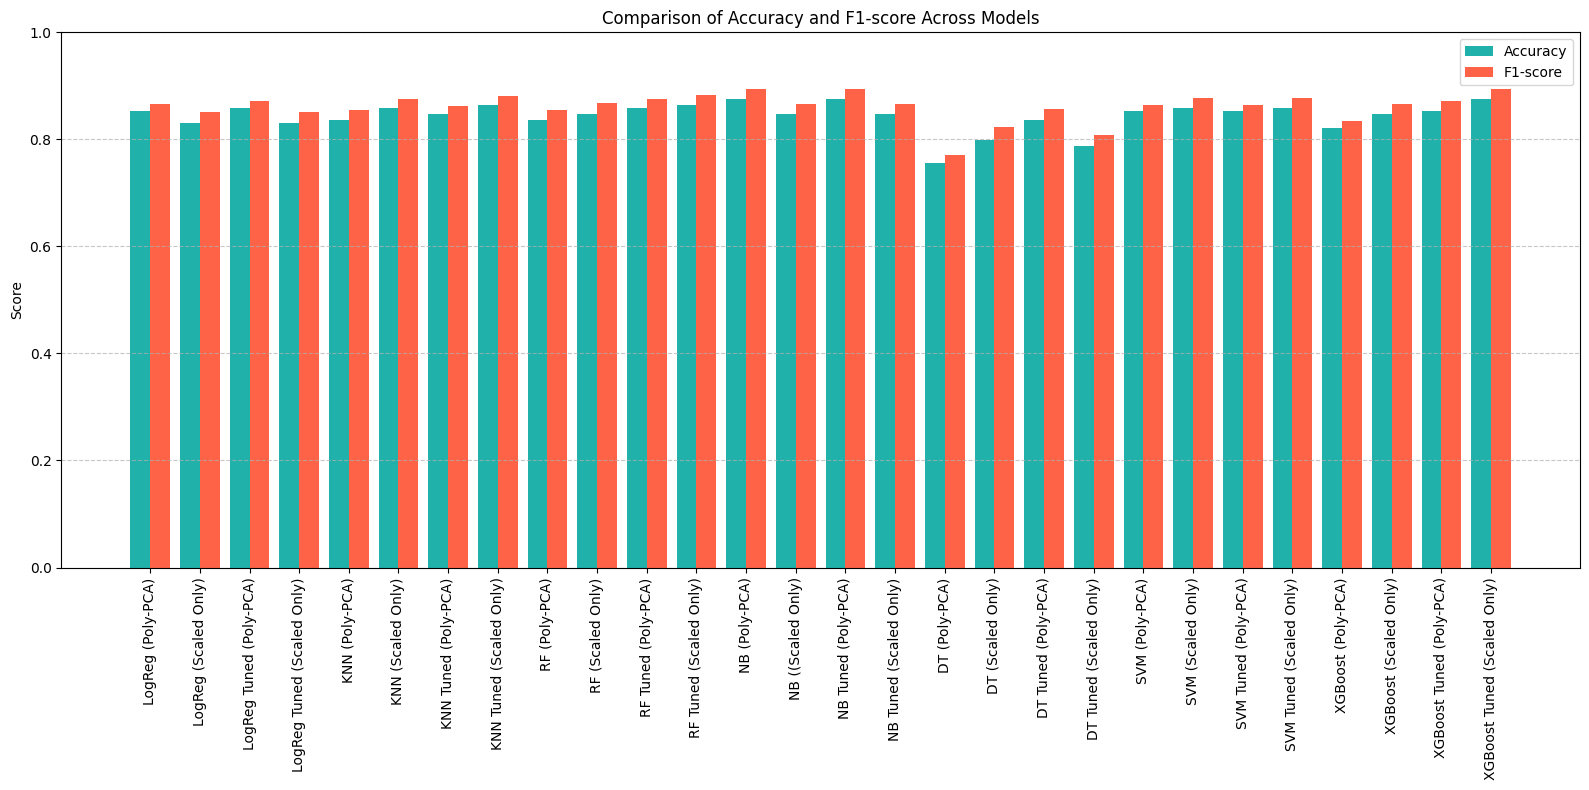

In [ ]:
#F1 Score and Accuracy Comparison for All Models
model_names = [
    "LogReg (Poly-PCA)", "LogReg (Scaled Only)",
    "LogReg Tuned (Poly-PCA)", "LogReg Tuned (Scaled Only)",
    "KNN (Poly-PCA)", "KNN (Scaled Only)",
    "KNN Tuned (Poly-PCA)", "KNN Tuned (Scaled Only)",
    "RF (Poly-PCA)", "RF (Scaled Only)",
    "RF Tuned (Poly-PCA)", "RF Tuned (Scaled Only)",
    "NB (Poly-PCA)", "NB ((Scaled Only)",
    "NB Tuned (Poly-PCA)", "NB Tuned (Scaled Only)",
    "DT (Poly-PCA)", "DT (Scaled Only)",
    "DT Tuned (Poly-PCA)", "DT Tuned (Scaled Only)",
    "SVM (Poly-PCA)", "SVM (Scaled Only)",
    "SVM Tuned (Poly-PCA)", "SVM Tuned (Scaled Only)",
    "XGBoost (Poly-PCA)", "XGBoost (Scaled Only)",
    "XGBoost Tuned (Poly-PCA)", "XGBoost Tuned (Scaled Only)"
]

accuracies = [
    accuracy_score(y1_test, y_log_pred1), accuracy_score(y2_test, y_log_pred2),
    accuracy_score(y1_test, y_pred1), accuracy_score(y2_test, y_pred2),

    accuracy_score(y1_test, y_knn_pred1), accuracy_score(y2_test, y_knn_pred2),
    accuracy_score(y1_test, y_pred_knn1), accuracy_score(y2_test, y_pred_knn2),

    accuracy_score(y1_test, y_rf_pred1), accuracy_score(y2_test, y_rf_pred2),
    accuracy_score(y1_test, y_pred_rf1), accuracy_score(y2_test, y_pred_rf2),

    accuracy_score(y1_test, y_nb_pred1), accuracy_score(y2_test, y_nb_pred2),
    accuracy_score(y1_test, y_pred_nb1), accuracy_score(y2_test, y_pred_nb2),

    accuracy_score(y1_test, y_dt_pred1), accuracy_score(y2_test, y_dt_pred2),
    accuracy_score(y1_test, y_pred_dt1), accuracy_score(y2_test, y_pred_dt2),

    accuracy_score(y1_test, y_svm_pred1), accuracy_score(y2_test, y_svm_pred2),
    accuracy_score(y1_test, y_pred_svm1), accuracy_score(y2_test, y_pred_svm2),

    accuracy_score(y1_test, y_pred_xgb1), accuracy_score(y2_test, y_pred_xgb2),
    accuracy_score(y1_test, y_xgb1_pred), accuracy_score(y2_test, y_xgb2_pred)
]

f1_scores = [
    f1_score(y1_test, y_log_pred1), f1_score(y2_test, y_log_pred2),
    f1_score(y1_test, y_pred1), f1_score(y2_test, y_pred2),

    f1_score(y1_test, y_knn_pred1), f1_score(y2_test, y_knn_pred2),
    f1_score(y1_test, y_pred_knn1), f1_score(y2_test, y_pred_knn2),

    f1_score(y1_test, y_rf_pred1), f1_score(y2_test, y_rf_pred2),
    f1_score(y1_test, y_pred_rf1), f1_score(y2_test, y_pred_rf2),

    f1_score(y1_test, y_nb_pred1), f1_score(y2_test, y_nb_pred2),
    f1_score(y1_test, y_pred_nb1), f1_score(y2_test, y_pred_nb2),

    f1_score(y1_test, y_dt_pred1), f1_score(y2_test, y_dt_pred2),
    f1_score(y1_test, y_pred_dt1), f1_score(y2_test, y_pred_dt2),

    f1_score(y1_test, y_svm_pred1), f1_score(y2_test, y_svm_pred2),
    f1_score(y1_test, y_pred_svm1), f1_score(y2_test, y_pred_svm2),

    f1_score(y1_test, y_pred_xgb1), f1_score(y2_test, y_pred_xgb2),
    f1_score(y1_test, y_xgb1_pred), f1_score(y2_test, y_xgb2_pred)
]

df_results = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "F1-score": f1_scores
})
df_results = df_results.sort_values(by='F1-score', ascending=True)
print(df_results)

x = np.arange(len(model_names))
width = 0.4

plt.figure(figsize=(16, 8))
plt.bar(x - width/2, accuracies, width, label='Accuracy', color='lightseagreen')
plt.bar(x + width/2, f1_scores, width, label='F1-score', color='tomato')

plt.xticks(x, model_names, rotation=90)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Comparison of Accuracy and F1-score Across Models")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


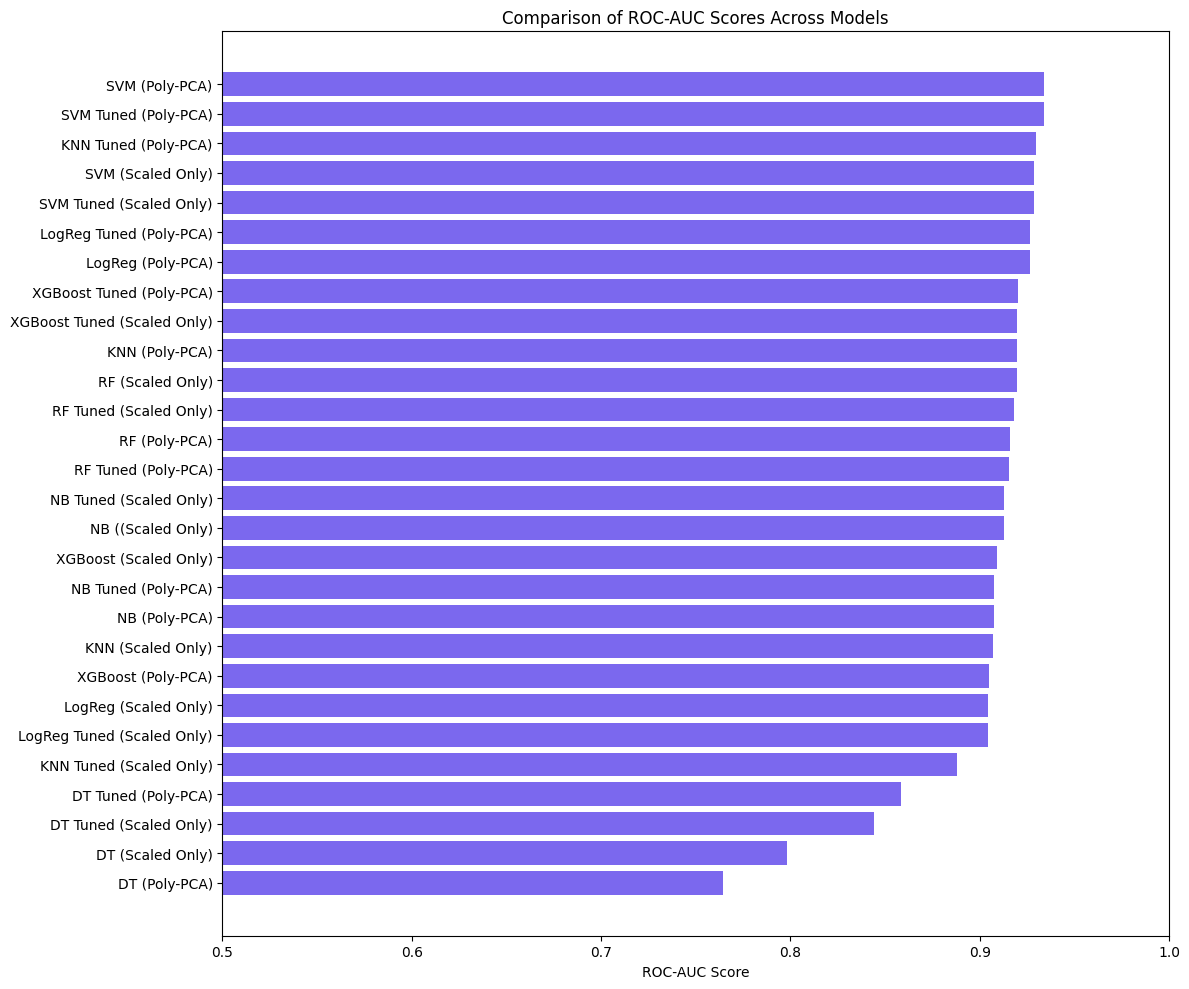

                          Model   ROC-AUC
16                DT (Poly-PCA)  0.764231
17             DT (Scaled Only)  0.797973
19       DT Tuned (Scaled Only)  0.844156
18          DT Tuned (Poly-PCA)  0.858357
7       KNN Tuned (Scaled Only)  0.887972
3    LogReg Tuned (Scaled Only)  0.904236
1          LogReg (Scaled Only)  0.904479
24           XGBoost (Poly-PCA)  0.904843
5             KNN (Scaled Only)  0.906785
12                NB (Poly-PCA)  0.907392
14          NB Tuned (Poly-PCA)  0.907392
25        XGBoost (Scaled Only)  0.909212
13            NB ((Scaled Only)  0.912732
15       NB Tuned (Scaled Only)  0.912732
10          RF Tuned (Poly-PCA)  0.915645
8                 RF (Poly-PCA)  0.916070
11       RF Tuned (Scaled Only)  0.918315
9              RF (Scaled Only)  0.919468
4                KNN (Poly-PCA)  0.919650
27  XGBoost Tuned (Scaled Only)  0.919772
26     XGBoost Tuned (Poly-PCA)  0.920379
0             LogReg (Poly-PCA)  0.926326
2       LogReg Tuned (Poly-PCA)  0

In [ ]:
#AUC and ROC Comparison for All Models
from sklearn.metrics import roc_auc_score

model_names = [
    "LogReg (Poly-PCA)", "LogReg (Scaled Only)",
    "LogReg Tuned (Poly-PCA)", "LogReg Tuned (Scaled Only)",
    "KNN (Poly-PCA)", "KNN (Scaled Only)",
    "KNN Tuned (Poly-PCA)", "KNN Tuned (Scaled Only)",
    "RF (Poly-PCA)", "RF (Scaled Only)",
    "RF Tuned (Poly-PCA)", "RF Tuned (Scaled Only)",
    "NB (Poly-PCA)", "NB ((Scaled Only)",
    "NB Tuned (Poly-PCA)", "NB Tuned (Scaled Only)",
    "DT (Poly-PCA)", "DT (Scaled Only)",
    "DT Tuned (Poly-PCA)", "DT Tuned (Scaled Only)",
    "SVM (Poly-PCA)", "SVM (Scaled Only)",
    "SVM Tuned (Poly-PCA)", "SVM Tuned (Scaled Only)",
    "XGBoost (Poly-PCA)", "XGBoost (Scaled Only)",
    "XGBoost Tuned (Poly-PCA)", "XGBoost Tuned (Scaled Only)"
]

y_scores = [
    log_model1.predict_proba(X1_test)[:, 1],
    log_model2.predict_proba(X2_test)[:, 1],
    best_clf1.best_estimator_.predict_proba(X1_test)[:, 1],
    best_clf2.best_estimator_.predict_proba(X2_test)[:, 1],

    knn1_model.predict_proba(X1_test)[:, 1],
    knn2_model.predict_proba(X2_test)[:, 1],
    grid_search_knn1.best_estimator_.predict_proba(X1_test)[:, 1],
    grid_search_knn2.best_estimator_.predict_proba(X2_test)[:, 1],

    rf1.predict_proba(X1_test)[:, 1],
    rf2.predict_proba(X2_test)[:, 1],
    best_rf1.predict_proba(X1_test)[:, 1],
    best_rf2.predict_proba(X2_test)[:, 1],

    nb1.predict_proba(X1_test)[:, 1],
    nb2.predict_proba(X2_test)[:, 1],
    best_nb1.predict_proba(X1_test)[:, 1],
    best_nb2.predict_proba(X2_test)[:, 1],

    dt1.predict_proba(X1_test)[:, 1],
    dt2.predict_proba(X2_test)[:, 1],
    best_dt1.predict_proba(X1_test)[:, 1],
    best_dt2.predict_proba(X2_test)[:, 1],

    svm1.predict_proba(X1_test)[:, 1],
    svm2.predict_proba(X2_test)[:, 1],
    best_svm1.predict_proba(X1_test)[:, 1],
    best_svm2.predict_proba(X2_test)[:, 1],

    xgb1.predict_proba(X1_test)[:, 1],
    xgb2.predict_proba(X2_test)[:, 1],
    best_xgb1.predict_proba(X1_test)[:, 1],
    best_xgb2.predict_proba(X2_test)[:, 1]
]

auc_scores = [roc_auc_score(y1_test, y_score) if "Poly" in name else roc_auc_score(y2_test, y_score)
              for name, y_score in zip(model_names, y_scores)]

df_auc = pd.DataFrame({
    "Model": model_names,
    "ROC-AUC": auc_scores
})

df_auc =  df_auc.sort_values(by='ROC-AUC', ascending=True)

plt.figure(figsize=(12, 10))
plt.barh(df_auc["Model"], df_auc["ROC-AUC"], color='mediumslateblue')
plt.xlabel("ROC-AUC Score")
plt.title("Comparison of ROC-AUC Scores Across Models")
plt.xlim(0.5, 1)
plt.tight_layout()
plt.show()

print(df_auc)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but KNeighborsClassifier was fitted without feature names
  warnings.warn(


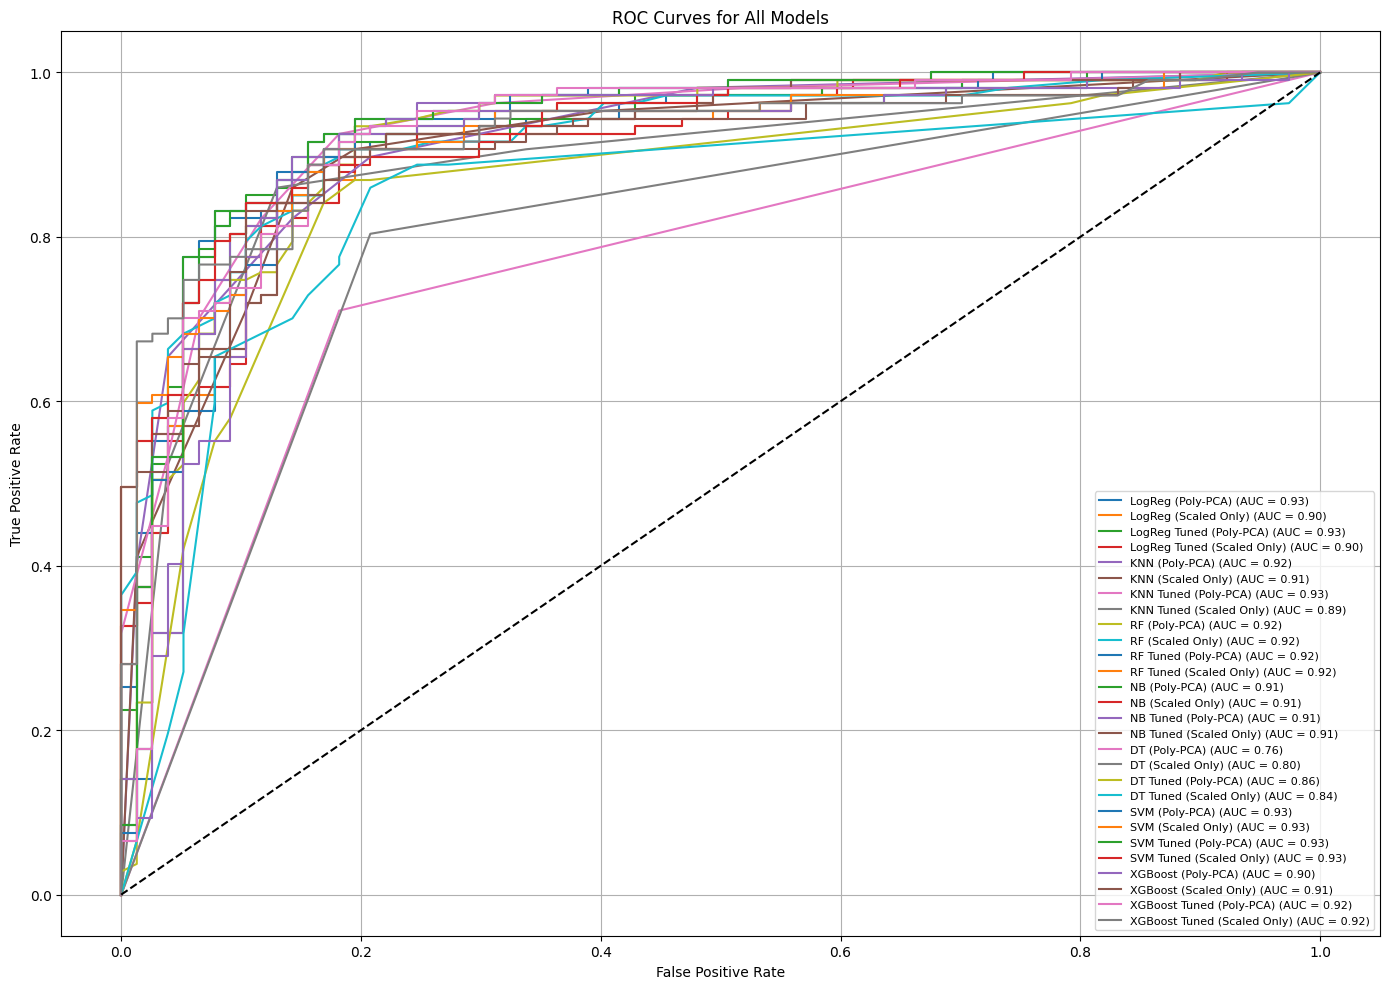

In [ ]:
#ROC Curves for All Models
from sklearn.metrics import roc_curve, roc_auc_score

models_all = {
    "LogReg (Poly-PCA)": log_model1,
    "LogReg (Scaled Only)": log_model2,
    "LogReg Tuned (Poly-PCA)": best_clf1.best_estimator_,
    "LogReg Tuned (Scaled Only)": best_clf2.best_estimator_,

    "KNN (Poly-PCA)": knn1_model,
    "KNN (Scaled Only)": knn2_model,
    "KNN Tuned (Poly-PCA)": grid_search_knn1.best_estimator_,
    "KNN Tuned (Scaled Only)": grid_search_knn2.best_estimator_,

    "RF (Poly-PCA)": rf1,
    "RF (Scaled Only)": rf2,
    "RF Tuned (Poly-PCA)": best_rf1,
    "RF Tuned (Scaled Only)": best_rf2,

    "NB (Poly-PCA)": nb1,
    "NB (Scaled Only)": nb2,
    "NB Tuned (Poly-PCA)": best_nb1,
    "NB Tuned (Scaled Only)": best_nb2,

    "DT (Poly-PCA)": dt1,
    "DT (Scaled Only)": dt2,
    "DT Tuned (Poly-PCA)": best_dt1,
    "DT Tuned (Scaled Only)": best_dt2,

    "SVM (Poly-PCA)": svm1,
    "SVM (Scaled Only)": svm2,
    "SVM Tuned (Poly-PCA)": best_svm1,
    "SVM Tuned (Scaled Only)": best_svm2,

    "XGBoost (Poly-PCA)": xgb1,
    "XGBoost (Scaled Only)": xgb2,
    "XGBoost Tuned (Poly-PCA)": best_xgb1,
    "XGBoost Tuned (Scaled Only)": best_xgb2
}

plt.figure(figsize=(14, 10))

for name, model in models_all.items():
    try:
        X = X1_test if "Poly" in name else X2_test
        y = y1_test if "Poly" in name else y2_test

        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X)
        else:
            raise ValueError(f"Model {name} Error")

        fpr, tpr, _ = roc_curve(y, y_score)
        auc = roc_auc_score(y, y_score)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

    except Exception as e:
        print(f"Error: {e}")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curves for All Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()


Evaluation Comparison Between All Tuned Models


After evaluating both baseline and tuned versions of all models, it was observed that almost all tuned models consistently outperformed their untuned counterparts in terms of accuracy, F1-score, and AUC with the exception of Decision Tree (Scaled), where improvements were minimal or inconsistent for Accuracy and F1-Score. Therefore, for clarity and better comparison, we will visualize and analyze only the performance of the tuned models in the following charts.

                          Model  Accuracy  F1-score
9        DT Tuned (Scaled Only)  0.788043  0.807882
1    LogReg Tuned (Scaled Only)  0.831522  0.850242
8           DT Tuned (Poly-PCA)  0.836957  0.857143
2          KNN Tuned (Poly-PCA)  0.847826  0.862745
10         SVM Tuned (Poly-PCA)  0.853261  0.864322
7        NB Tuned (Scaled Only)  0.847826  0.866667
0       LogReg Tuned (Poly-PCA)  0.858696  0.871287
12     XGBoost Tuned (Poly-PCA)  0.853261  0.872038
4           RF Tuned (Poly-PCA)  0.858696  0.875000
11      SVM Tuned (Scaled Only)  0.858696  0.877358
3       KNN Tuned (Scaled Only)  0.864130  0.880383
5        RF Tuned (Scaled Only)  0.864130  0.882629
6           NB Tuned (Poly-PCA)  0.875000  0.894009
13  XGBoost Tuned (Scaled Only)  0.875000  0.894009


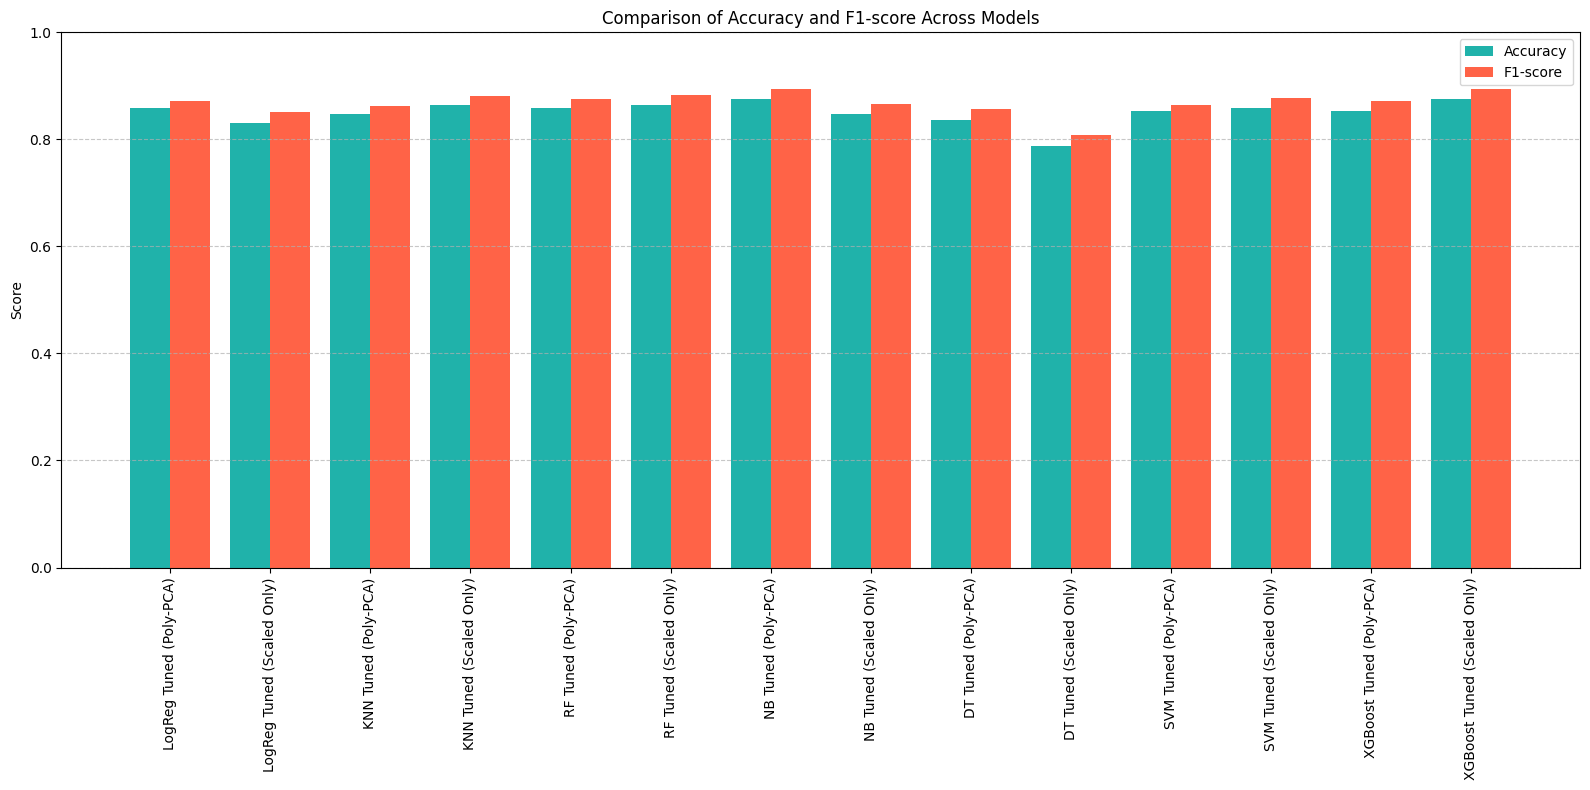

In [ ]:
#F1 Score and Accuracy Comparison for All Tuned Models
model_names = [
    "LogReg Tuned (Poly-PCA)", "LogReg Tuned (Scaled Only)",
    "KNN Tuned (Poly-PCA)", "KNN Tuned (Scaled Only)",
    "RF Tuned (Poly-PCA)", "RF Tuned (Scaled Only)",
    "NB Tuned (Poly-PCA)", "NB Tuned (Scaled Only)",
    "DT Tuned (Poly-PCA)", "DT Tuned (Scaled Only)",
    "SVM Tuned (Poly-PCA)", "SVM Tuned (Scaled Only)",
    "XGBoost Tuned (Poly-PCA)", "XGBoost Tuned (Scaled Only)"
]

accuracies = [
    accuracy_score(y1_test, y_pred1), accuracy_score(y2_test, y_pred2),
    accuracy_score(y1_test, y_pred_knn1), accuracy_score(y2_test, y_pred_knn2),
    accuracy_score(y1_test, y_pred_rf1), accuracy_score(y2_test, y_pred_rf2),
    accuracy_score(y1_test, y_pred_nb1), accuracy_score(y2_test, y_pred_nb2),
    accuracy_score(y1_test, y_pred_dt1), accuracy_score(y2_test, y_pred_dt2),
    accuracy_score(y1_test, y_pred_svm1), accuracy_score(y2_test, y_pred_svm2),
    accuracy_score(y1_test, y_xgb1_pred), accuracy_score(y2_test, y_xgb2_pred)
]

f1_scores = [
    f1_score(y1_test, y_pred1), f1_score(y2_test, y_pred2),
    f1_score(y1_test, y_pred_knn1), f1_score(y2_test, y_pred_knn2),
    f1_score(y1_test, y_pred_rf1), f1_score(y2_test, y_pred_rf2),
    f1_score(y1_test, y_pred_nb1), f1_score(y2_test, y_pred_nb2),
    f1_score(y1_test, y_pred_dt1), f1_score(y2_test, y_pred_dt2),
    f1_score(y1_test, y_pred_svm1), f1_score(y2_test, y_pred_svm2),
    f1_score(y1_test, y_xgb1_pred), f1_score(y2_test, y_xgb2_pred)
]

df_results = pd.DataFrame({
    "Model": model_names,
    "Accuracy": accuracies,
    "F1-score": f1_scores
})
df_results = df_results.sort_values(by='F1-score', ascending=True)
print(df_results)

x = np.arange(len(model_names))
width = 0.4

plt.figure(figsize=(16, 8))
plt.bar(x - width/2, accuracies, width, label='Accuracy', color='lightseagreen')
plt.bar(x + width/2, f1_scores, width, label='F1-score', color='tomato')

plt.xticks(x, model_names, rotation=90)
plt.ylabel("Score")
plt.ylim(0, 1)
plt.title("Comparison of Accuracy and F1-score Across Models")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

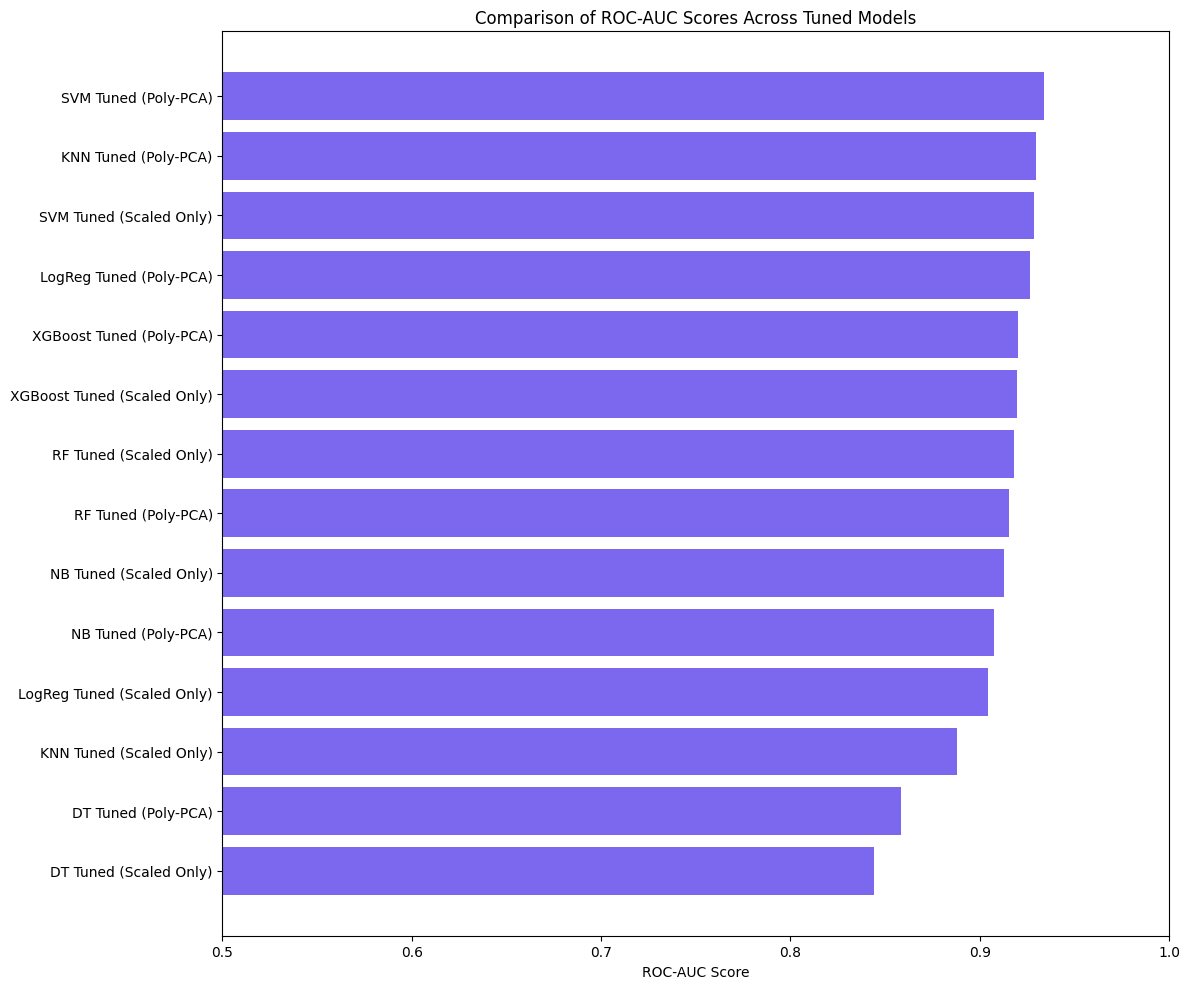

                          Model   ROC-AUC
9        DT Tuned (Scaled Only)  0.844156
8           DT Tuned (Poly-PCA)  0.858357
3       KNN Tuned (Scaled Only)  0.887972
1    LogReg Tuned (Scaled Only)  0.904236
6           NB Tuned (Poly-PCA)  0.907392
7        NB Tuned (Scaled Only)  0.912732
4           RF Tuned (Poly-PCA)  0.915645
5        RF Tuned (Scaled Only)  0.918315
13  XGBoost Tuned (Scaled Only)  0.919772
12     XGBoost Tuned (Poly-PCA)  0.920379
0       LogReg Tuned (Poly-PCA)  0.926447
11      SVM Tuned (Scaled Only)  0.928511
2          KNN Tuned (Poly-PCA)  0.929482
10         SVM Tuned (Poly-PCA)  0.933851


In [ ]:
#AUC and ROC Comparison for All Tuned Models
from sklearn.metrics import roc_auc_score

model_names = [
    "LogReg Tuned (Poly-PCA)", "LogReg Tuned (Scaled Only)",
    "KNN Tuned (Poly-PCA)", "KNN Tuned (Scaled Only)",
    "RF Tuned (Poly-PCA)", "RF Tuned (Scaled Only)",
    "NB Tuned (Poly-PCA)", "NB Tuned (Scaled Only)",
    "DT Tuned (Poly-PCA)", "DT Tuned (Scaled Only)",
    "SVM Tuned (Poly-PCA)", "SVM Tuned (Scaled Only)",
    "XGBoost Tuned (Poly-PCA)", "XGBoost Tuned (Scaled Only)"
]

y_scores = [
    best_clf1.best_estimator_.predict_proba(X1_test)[:, 1],
    best_clf2.best_estimator_.predict_proba(X2_test)[:, 1],

    grid_search_knn1.best_estimator_.predict_proba(X1_test)[:, 1],
    grid_search_knn2.best_estimator_.predict_proba(X2_test)[:, 1],

    best_rf1.predict_proba(X1_test)[:, 1],
    best_rf2.predict_proba(X2_test)[:, 1],

    best_nb1.predict_proba(X1_test)[:, 1],
    best_nb2.predict_proba(X2_test)[:, 1],

    best_dt1.predict_proba(X1_test)[:, 1],
    best_dt2.predict_proba(X2_test)[:, 1],

    best_svm1.predict_proba(X1_test)[:, 1],
    best_svm2.predict_proba(X2_test)[:, 1],

    best_xgb1.predict_proba(X1_test)[:, 1],
    best_xgb2.predict_proba(X2_test)[:, 1]
]

auc_scores = [roc_auc_score(y1_test, y_score) if "Poly" in name else roc_auc_score(y2_test, y_score)
              for name, y_score in zip(model_names, y_scores)]

df_auc = pd.DataFrame({
    "Model": model_names,
    "ROC-AUC": auc_scores
})

df_auc =  df_auc.sort_values(by='ROC-AUC', ascending=True)

plt.figure(figsize=(12, 10))
plt.barh(df_auc["Model"], df_auc["ROC-AUC"], color='mediumslateblue')
plt.xlabel("ROC-AUC Score")
plt.title("Comparison of ROC-AUC Scores Across Tuned Models")
plt.xlim(0.5, 1)
plt.tight_layout()
plt.show()

print(df_auc)

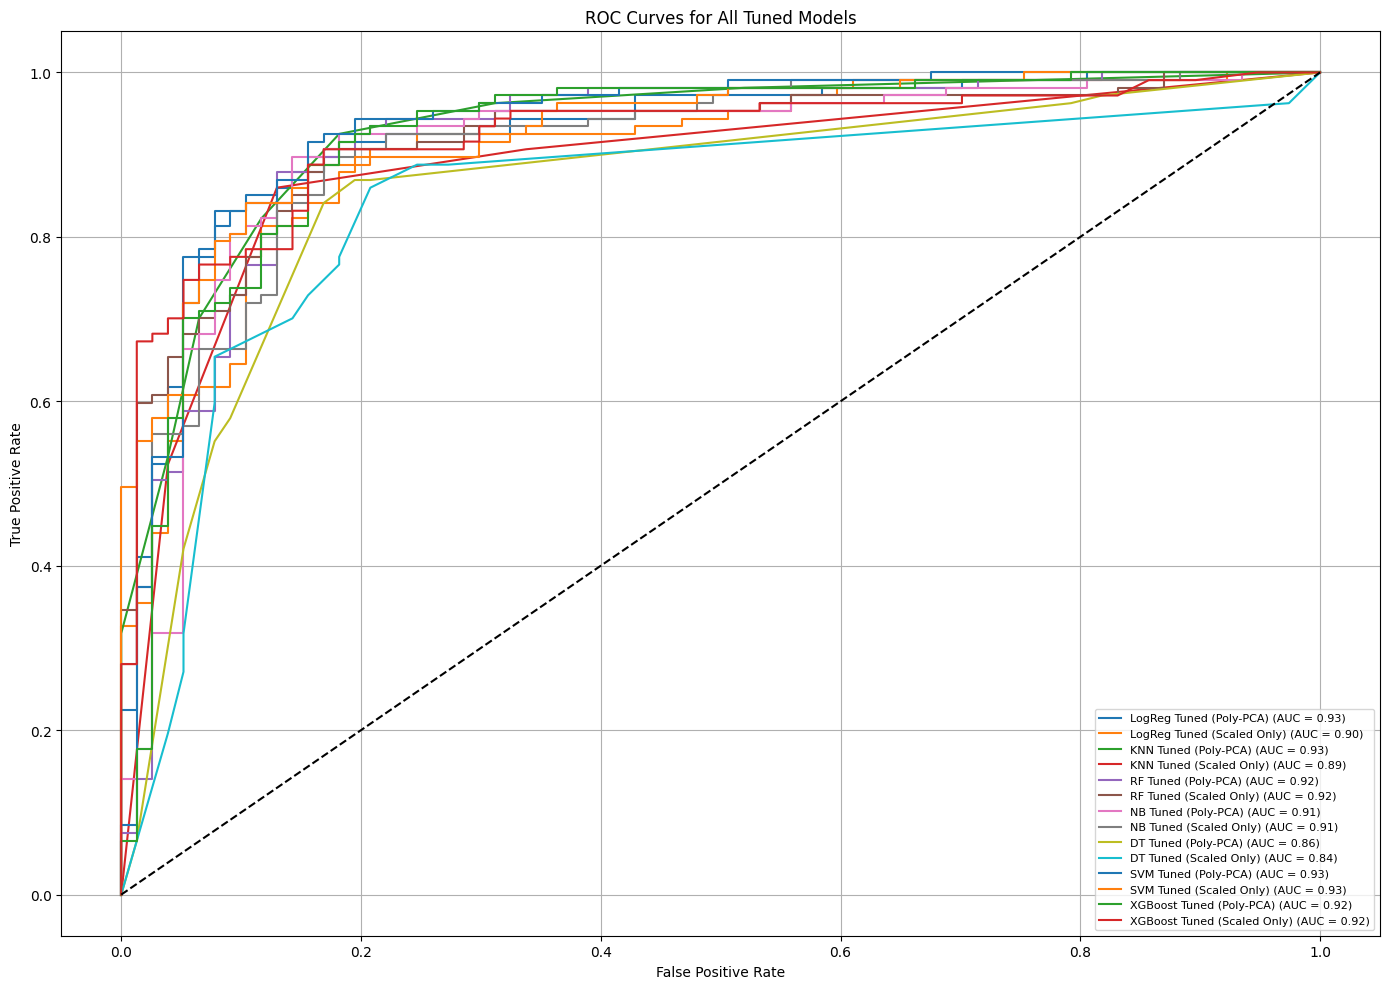

In [ ]:
#ROC Curves for All Tuned Models
from sklearn.metrics import roc_curve, roc_auc_score

models_all = {
    "LogReg Tuned (Poly-PCA)": best_clf1.best_estimator_,
    "LogReg Tuned (Scaled Only)": best_clf2.best_estimator_,

    "KNN Tuned (Poly-PCA)": grid_search_knn1.best_estimator_,
    "KNN Tuned (Scaled Only)": grid_search_knn2.best_estimator_,

    "RF Tuned (Poly-PCA)": best_rf1,
    "RF Tuned (Scaled Only)": best_rf2,

    "NB Tuned (Poly-PCA)": best_nb1,
    "NB Tuned (Scaled Only)": best_nb2,

    "DT Tuned (Poly-PCA)": best_dt1,
    "DT Tuned (Scaled Only)": best_dt2,

    "SVM Tuned (Poly-PCA)": best_svm1,
    "SVM Tuned (Scaled Only)": best_svm2,

    "XGBoost Tuned (Poly-PCA)": best_xgb1,
    "XGBoost Tuned (Scaled Only)": best_xgb2
}

plt.figure(figsize=(14, 10))

for name, model in models_all.items():
    try:
        X = X1_test if "Poly" in name else X2_test
        y = y1_test if "Poly" in name else y2_test

        if hasattr(model, "predict_proba"):
            y_score = model.predict_proba(X)[:, 1]
        elif hasattr(model, "decision_function"):
            y_score = model.decision_function(X)
        else:
            raise ValueError(f"Model {name} Error")

        fpr, tpr, _ = roc_curve(y, y_score)
        auc = roc_auc_score(y, y_score)
        plt.plot(fpr, tpr, label=f"{name} (AUC = {auc:.2f})")

    except Exception as e:
        print(f"Error: {e}")

plt.plot([0, 1], [0, 1], linestyle='--', color='black')
plt.title("ROC Curves for All Tuned Models")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.legend(loc="lower right", fontsize=8)
plt.grid(True)
plt.tight_layout()
plt.show()
